In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.linear_model import LinearRegression as LR
from scipy.stats import norm
from functools import reduce 
import random
from pandas.plotting import parallel_coordinates as pcp
%matplotlib inline

In [2]:
def get_score(mdl,x,y):
    mdl.fit(x,y)
    return mdl.score(x,y)

In [3]:
def CreateScatter(df1, s1, alpha1, figsize, dpi, xlabel, xlabelsize, xticksize, ylabel, ylabelsize, yticksize,
                  title, titlefontsize, marker, scattercolor, x1=0, y1=0, df2=None, s2=None):
    '''
    Notes:
    -figsize must be in parenthesis. Ex: figsize=(6,6)
    -df1 should be points you don't want to stick out
    -df2 should be points you want to stick out
    '''
    plt.figure(figsize=figsize, dpi=dpi)
    
    # scatterplots from dataframe 1
    plt.scatter(x=df1.iloc[:,[0]],y=df1.iloc[:,[1]], 
            marker=marker, s=s1, alpha=alpha1, color=scattercolor)
    
    
    # scatterplots from dataframe 2
    if df2 is not None:
        plt.scatter(x=df2.iloc[:,[0]],y=df2.iloc[:,[1]], 
                marker=marker, s=s2, color=scattercolor, edgecolor='black')
    

    plt.xlabel(xlabel=xlabel, fontsize=xlabelsize)
    plt.ylabel(ylabel=ylabel, fontsize=ylabelsize)
    plt.title(label=title, fontsize=titlefontsize, horizontalalignment='center', weight='bold')
    
    
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize)
    plt.grid(axis='both', ls='--', color='black', alpha=.25)
    plt.box()
    
    

In [4]:
def CreateDoubleBarH(df, figsize, title, titlefontsize, xticksize, yticksize, ytickrotate, 
               upperbarshiftup, lowerbarshiftdown, shiftupperbarleft, shiftlowerbarleft, textbarfontsize,
               textbarcolor, legend_labels, legend_order, legend_pos, legend_size, width=.7, color=None,):
    
    '''
    Notes:
    -futhermost column to the right is the upper bar, lower ones are to the left
    -figsize should be expressed in parenthesis. Ex: figsize = (6,6)
    -color should be expressed in brackets. Ex: color = ['black', 'red']
    -legend labels should be expressed in brackets. Ex: legend_labels = ["what", "is"]
    -legend position should be expressed in brackets. Ex: legend_pos = [.75, .6]
    -legend order should be expressed in brackets. Ex: legend_order = [1,0]
    '''
    
    df[::-1].plot.barh(figsize=figsize, width=width, color=color)

    plt.title(label=title, fontsize=titlefontsize, weight='bold', horizontalalignment='center')
    
    # text for upper bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,1]-shiftupperbarleft,
                i+upperbarshiftup,
                round(df[::-1].iloc[i,1],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for lower bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,0]-shiftlowerbarleft,
                i-lowerbarshiftdown,
                round(df[::-1].iloc[i,0],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
        
    plt.ylabel('')
    
    plt.box()
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize, rotation=ytickrotate)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = legend_labels

    order = legend_order

    plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=legend_pos,
               prop={'size': legend_size})

In [5]:
def CreateTripleBarH(df, figsize, title, titlefontsize, xticksize, yticksize, ytickrotate, 
               upperbarshiftup, middlebarshiftup, lowerbarshiftdown, shiftupperbarleft, shiftlowerbarleft, 
                shiftmiddlebarleft, textbarfontsize,
               textbarcolor, legend_labels, legend_order, legend_pos, legend_size, width=.7, color=None,):
    
    '''
    Notes:
    -futhermost column to the right is the upper bar, lower ones are to the left
    -figsize should be expressed in parenthesis. Ex: figsize = (6,6)
    -color should be expressed in brackets. Ex: color = ['black', 'red']
    -legend labels should be expressed in brackets. Ex: legend_labels = ["what", "is"]
    -legend position should be expressed in brackets. Ex: legend_pos = [.75, .6]
    -legend order should be expressed in brackets. Ex: legend_order = [1,0]
    '''
    
    df[::-1].plot.barh(figsize=figsize, width=width, color=color)

    plt.title(label=title, fontsize=titlefontsize, weight='bold', horizontalalignment='center')
    
    # text for upper bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,2]-shiftupperbarleft,
                i+upperbarshiftup,
                round(df[::-1].iloc[i,2],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for middle bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,1]-shiftmiddlebarleft,
                i+middlebarshiftup,
                round(df[::-1].iloc[i,1],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for lower bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,0]-shiftlowerbarleft,
                i-lowerbarshiftdown,
                round(df[::-1].iloc[i,0],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
        
    plt.ylabel('')
    
    plt.box()
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize, rotation=ytickrotate)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = legend_labels

    order = legend_order

    plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=legend_pos,
               prop={'size': legend_size})

# Questions to answer:
### 1) How much has offense changed in the NBA from the last 25 regular seasons and what has changed in that time?

### 2) What is the best metric that predicts winning in the NBA during the regular season?

### 3) What is the relationship between offensive/defensive rating and team quality in the NBA during the regular season?

### 4) How much has the relationships between offensive/defensive rating and team quality changed throughout the years?

### 5) What is the best metric that predicts offensive rating in the NBA during the regular season?

In [6]:
team_traditional21 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2021-22')
team_traditional21.set_index('TEAM', inplace=True)
team_advanced21 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2021-22')
team_advanced21.set_index('TEAM', inplace=True)
team_shooting21 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2021-22')
team_shooting21.set_index('TEAM', inplace=True)

df_team21 = pd.concat([team_traditional21, team_advanced21.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting21], axis=1)
df_team21.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,43,39,0.524,48.7,115.4,42.0,89.4,47.0,13.0,...,46.6,1.7,4.3,38.6,3.4,8.1,42.4,9.4,26.1,36.1


In [7]:
team_traditional20 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2020-21')
team_traditional20.set_index('TEAM', inplace=True)
team_advanced20 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2020-21')
team_advanced20.set_index('TEAM', inplace=True)
team_shooting20 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2020-21')
team_shooting20.set_index('TEAM', inplace=True)

df_team20 = pd.concat([team_traditional20, team_advanced20.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting20], axis=1)
df_team20.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,72,41,31,0.569,48.6,114.3,41.0,87.7,46.8,12.5,...,43.6,1.5,4.2,36.1,2.9,7.4,39.4,9.5,25.8,36.8


In [8]:
team_traditional19 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2019-20')
team_traditional19.set_index('TEAM', inplace=True)
team_advanced19 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2019-20')
team_advanced19.set_index('TEAM', inplace=True)
team_shooting19 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2019-20')
team_shooting19.set_index('TEAM', inplace=True)

df_team19 = pd.concat([team_traditional19, team_advanced19.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting19], axis=1)
df_team19.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,67,20,47,0.299,46.5,107.0,38.9,86.7,44.9,11.5,...,36.7,1.3,4.1,31.3,2.6,7.8,33.8,9.4,28.1,33.4


In [9]:
team_traditional18 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2018-19')
team_traditional18.set_index('TEAM', inplace=True)
team_advanced18 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2018-19')
team_advanced18.set_index('TEAM', inplace=True)
team_shooting18 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2018-19')
team_shooting18.set_index('TEAM', inplace=True)

df_team18 = pd.concat([team_traditional18, team_advanced18.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting18], axis=1)
df_team18.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,29,53,0.354,46.0,107.5,39.3,87.1,45.1,12.3,...,37.3,2.2,5.4,40.6,3.9,9.9,39.1,9.1,26.9,34.0


In [10]:
team_traditional17 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2017-18')
team_traditional17.set_index('TEAM', inplace=True)
team_advanced17 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2017-18')
team_advanced17.set_index('TEAM', inplace=True)
team_shooting17 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2017-18')
team_shooting17.set_index('TEAM', inplace=True)

df_team17 = pd.concat([team_traditional17, team_advanced17.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting17], axis=1)
df_team17.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,24,58,0.293,48.6,104.4,38.6,86.5,44.6,11.3,...,39.6,1.7,3.7,46.1,3.4,8.0,42.6,7.7,22.6,34.1


In [11]:
team_traditional16 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2016-17')
team_traditional16.set_index('TEAM', inplace=True)
team_advanced16 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2016-17')
team_advanced16.set_index('TEAM', inplace=True)
team_shooting16 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2016-17')
team_shooting16.set_index('TEAM', inplace=True)

df_team16 = pd.concat([team_traditional16, team_advanced16.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting16], axis=1)
df_team16.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,43,39,0.524,49.1,104.5,38.6,85.5,45.1,9.0,...,34.7,1.4,3.3,41.4,2.4,6.2,38.3,6.5,19.6,33.1


In [12]:
team_traditional15 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2015-16')
team_traditional15.set_index('TEAM', inplace=True)
team_advanced15 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2015-16')
team_advanced15.set_index('TEAM', inplace=True)
team_shooting15 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2015-16')
team_shooting15.set_index('TEAM', inplace=True)

df_team15 = pd.concat([team_traditional15, team_advanced15.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting15], axis=1)
df_team15.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,48,34,0.585,49.2,104.6,39.3,85.9,45.8,10.1,...,35.1,1.4,3.7,37.5,2.6,7.0,36.3,7.4,21.2,34.8


In [13]:
team_traditional14 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2014-15')
team_traditional14.set_index('TEAM', inplace=True)
team_advanced14 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2014-15')
team_advanced14.set_index('TEAM', inplace=True)
team_shooting14 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2014-15')
team_shooting14.set_index('TEAM', inplace=True)

df_team14 = pd.concat([team_traditional14, team_advanced14.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting14], axis=1)
df_team14.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,60,22,0.732,50.8,108.2,40.1,86.2,46.6,10.5,...,41.8,1.7,4.0,42.3,3.1,7.3,42.1,6.9,18.9,36.5


In [14]:
team_traditional13 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2013-14')
team_traditional13.set_index('TEAM', inplace=True)
team_advanced13 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2013-14')
team_advanced13.set_index('TEAM', inplace=True)
team_shooting13 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2013-14')
team_shooting13.set_index('TEAM', inplace=True)

df_team13 = pd.concat([team_traditional13, team_advanced13.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting13], axis=1)
df_team13.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,38,44,0.463,50.3,104.9,38.8,84.7,45.8,9.7,...,37.9,1.4,3.5,40.8,2.8,7.1,39.3,6.6,18.5,35.4


In [15]:
team_traditional12 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2012-13')
team_traditional12.set_index('TEAM', inplace=True)
team_advanced12 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2012-13')
team_advanced12.set_index('TEAM', inplace=True)
team_shooting12 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2012-13')
team_shooting12.set_index('TEAM', inplace=True)

df_team12 = pd.concat([team_traditional12, team_advanced12.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting12], axis=1)
df_team12.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,44,38,0.537,51.3,103.7,39.8,85.8,46.4,9.1,...,42.6,1.3,3.1,41.4,2.7,6.4,42.0,5.9,16.7,35.6


In [16]:
team_traditional11 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2011-12')
team_traditional11.set_index('TEAM', inplace=True)
team_advanced11 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2011-12')
team_advanced11.set_index('TEAM', inplace=True)
team_shooting11 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2011-12')
team_shooting11.set_index('TEAM', inplace=True)

df_team11 = pd.concat([team_traditional11, team_advanced11.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting11], axis=1)
df_team11.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,66,40,26,0.606,52.9,104.2,39.7,87.4,45.4,8.0,...,40.7,1.3,3.3,38.5,2.8,7.0,39.7,4.7,13.0,35.8


In [17]:
team_traditional10 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2010-11')
team_traditional10.set_index('TEAM', inplace=True)
team_advanced10 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2010-11')
team_advanced10.set_index('TEAM', inplace=True)
team_shooting10 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2010-11')
team_shooting10.set_index('TEAM', inplace=True)

df_team10 = pd.concat([team_traditional10, team_advanced10.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting10], axis=1)
df_team10.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,44,38,0.537,53.3,105.1,40.1,86.8,46.2,6.8,...,38.5,1.0,2.7,37.4,2.4,6.2,38.0,3.7,11.0,34.0


In [18]:
team_traditional09 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2009-10')
team_traditional09.set_index('TEAM', inplace=True)
team_advanced09 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2009-10')
team_advanced09.set_index('TEAM', inplace=True)
team_shooting09 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2009-10')
team_shooting09.set_index('TEAM', inplace=True)

df_team09 = pd.concat([team_traditional09, team_advanced09.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting09], axis=1)
df_team09.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,53,29,0.646,52.8,111.0,42.3,90.5,46.8,7.0,...,37.3,1.0,2.8,34.8,2.6,7.1,36.3,3.8,10.4,36.5


In [19]:
team_traditional08 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2008-09')
team_traditional08.set_index('TEAM', inplace=True)
team_advanced08 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2008-09')
team_advanced08.set_index('TEAM', inplace=True)
team_shooting08 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2008-09')
team_shooting08.set_index('TEAM', inplace=True)

df_team08 = pd.concat([team_traditional08, team_advanced08.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting08], axis=1)
df_team08.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,47,35,0.573,53.1,108.3,39.8,86.8,45.8,8.0,...,38.9,1.1,2.8,37.7,2.4,6.2,38.4,4.9,13.5,36.2


In [20]:
team_traditional07 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2007-08')
team_traditional07.set_index('TEAM', inplace=True)
team_advanced07 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2007-08')
team_advanced07.set_index('TEAM', inplace=True)
team_shooting07 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2007-08')
team_shooting07.set_index('TEAM', inplace=True)

df_team07 = pd.concat([team_traditional07, team_advanced07.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting07], axis=1)
df_team07.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,37,45,0.451,52.0,105.5,39.0,85.8,45.4,5.0,...,40.4,0.5,1.5,37.1,1.4,3.5,39.0,3.3,9.4,34.9


In [21]:
team_traditional06 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2006-07')
team_traditional06.set_index('TEAM', inplace=True)
team_advanced06 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2006-07')
team_advanced06.set_index('TEAM', inplace=True)
team_shooting06 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2006-07')
team_shooting06.set_index('TEAM', inplace=True)

df_team06 = pd.concat([team_traditional06, team_advanced06.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting06], axis=1)
df_team06.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,30,52,0.366,52.8,102.0,37.6,84.6,44.4,4.5,...,34.0,0.6,1.5,41.2,1.3,3.4,37.1,2.9,9.1,31.6


In [22]:
team_traditional05 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2005-06')
team_traditional05.set_index('TEAM', inplace=True)
team_advanced05 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2005-06')
team_advanced05.set_index('TEAM', inplace=True)
team_shooting05 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2005-06')
team_shooting05.set_index('TEAM', inplace=True)

df_team05 = pd.concat([team_traditional05, team_advanced05.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting05], axis=1)
df_team05.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,26,56,0.317,52.3,104.8,38.7,85.4,45.4,5.6,...,39.8,0.7,1.9,38.4,1.6,4.2,39.2,3.6,9.8,36.3


In [23]:
team_traditional04 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2004-05')
team_traditional04.set_index('TEAM', inplace=True)
team_advanced04 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2004-05')
team_advanced04.set_index('TEAM', inplace=True)
team_shooting04 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2004-05')
team_shooting04.set_index('TEAM', inplace=True)

df_team04 = pd.concat([team_traditional04, team_advanced04.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting04], axis=1)
df_team04.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,13,69,0.159,51.6,98.8,38.2,86.7,44.1,4.0,...,28.2,0.5,1.7,30.6,1.0,3.2,29.4,2.8,8.5,32.6


In [24]:
team_traditional03 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2003-04')
team_traditional03.set_index('TEAM', inplace=True)
team_advanced03 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2003-04')
team_advanced03.set_index('TEAM', inplace=True)
team_shooting03 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2003-04')
team_shooting03.set_index('TEAM', inplace=True)

df_team03 = pd.concat([team_traditional03, team_advanced03.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting03], axis=1)
df_team03.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,28,54,0.341,51.8,99.1,36.8,85.0,43.3,5.5,...,38.6,0.7,2.1,33.9,1.7,4.6,36.5,3.4,10.6,32.3


In [25]:
team_traditional02 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2002-03')
team_traditional02.set_index('TEAM', inplace=True)
team_advanced02 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2002-03')
team_advanced02.set_index('TEAM', inplace=True)
team_shooting02 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2002-03')
team_shooting02.set_index('TEAM', inplace=True)

df_team02 = pd.concat([team_traditional02, team_advanced02.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting02], axis=1)
df_team02.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,35,47,0.427,51.8,100.4,37.2,83.7,44.4,5.2,...,40.5,0.8,2.1,39.0,1.6,3.9,39.8,3.3,9.9,33.8


In [26]:
team_traditional01 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2001-02')
team_traditional01.set_index('TEAM', inplace=True)
team_advanced01 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2001-02')
team_advanced01.set_index('TEAM', inplace=True)
team_shooting01 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2001-02')
team_shooting01.set_index('TEAM', inplace=True)

df_team01 = pd.concat([team_traditional01, team_advanced01.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting01], axis=1)
df_team01.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,33,49,0.402,51.5,100.4,37.8,86.1,43.9,5.5,...,31.5,0.8,2.3,36.5,1.3,3.9,34.2,3.8,10.6,36.1


In [27]:
team_traditional00 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 2000-01')
team_traditional00.set_index('TEAM', inplace=True)
team_advanced00 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 2000-01')
team_advanced00.set_index('TEAM', inplace=True)
team_shooting00 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 2000-01')
team_shooting00.set_index('TEAM', inplace=True)

df_team00 = pd.concat([team_traditional00, team_advanced00.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting00], axis=1)
df_team00.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,25,57,0.305,51.3,96.9,37.4,86.7,43.1,4.3,...,31.8,0.7,1.8,40.0,1.0,2.7,36.9,3.0,8.5,35.5


In [28]:
team_traditional99 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 1999-00')
team_traditional99.set_index('TEAM', inplace=True)
team_advanced99 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 1999-00')
team_advanced99.set_index('TEAM', inplace=True)
team_shooting99 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 1999-00')
team_shooting99.set_index('TEAM', inplace=True)

df_team99 = pd.concat([team_traditional99, team_advanced99.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting99], axis=1)
df_team99.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,28,54,0.341,51.3,100.1,38.8,88.0,44.1,3.3,...,46.8,0.3,0.7,42.9,0.6,1.4,45.0,2.5,8.4,29.9


In [29]:
team_traditional98 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 1998-99')
team_traditional98.set_index('TEAM', inplace=True)
team_advanced98 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 1998-99')
team_advanced98.set_index('TEAM', inplace=True)
team_shooting98 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 1998-99')
team_shooting98.set_index('TEAM', inplace=True)

df_team98 = pd.concat([team_traditional98, team_advanced98.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting98], axis=1)
df_team98.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,50,31,19,0.62,55.0,98.4,35.1,85.7,40.9,4.5,...,35.7,0.1,0.5,21.1,0.4,1.3,31.1,3.5,11.5,30.9


In [30]:
team_traditional97 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Traditional 1997-98')
team_traditional97.set_index('TEAM', inplace=True)
team_advanced97 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Advanced 1997-98')
team_advanced97.set_index('TEAM', inplace=True)
team_shooting97 = pd.read_excel('nbaRegularSeason_TeamStats.xlsx', sheet_name='Shooting 1997-98')
team_shooting97.set_index('TEAM', inplace=True)

df_team97 = pd.concat([team_traditional97, team_advanced97.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                       team_shooting97], axis=1)
df_team97.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,82,50,32,0.61,53.9,106.5,39.1,86.1,45.5,4.6,...,27.9,0.2,0.6,33.3,0.4,1.4,29.9,3.7,10.9,33.4


In [31]:
all_teams = [df_team21, df_team20, df_team19, df_team18, df_team17, df_team16, df_team15, df_team14, df_team13, df_team12,
           df_team11, df_team10, df_team09, df_team08, df_team07, df_team06, df_team05, df_team04, df_team03, df_team02,
           df_team01, df_team00, df_team99, df_team98, df_team97]

In [32]:
teams_10_21 = [df_team21, df_team20, df_team19, df_team18, df_team17, df_team16, df_team15, df_team14, df_team13, df_team12,
           df_team11, df_team10]

In [33]:
teams_97_09 = [df_team09, df_team08, df_team07, df_team06, df_team05, df_team04, df_team03, df_team02,
           df_team01, df_team00, df_team99, df_team98, df_team97]

### 1) How much has offense changed in the NBA from the last 25 regular seasons and what has changed in that time?

In [36]:
# Create a dataframe with lots of metrics

Mean_OFF = []
Mean_DEF = []
Mean_3PA = []
Mean_3Percent = []
Mean_FTA = []
Mean_FTpercent = []
Mean_EFG = []
Mean_TS = []
R2_OFF_WIN = []
R2_DEF_WIN = []
R2_NETRTG_WIN = []
R2_OFF_NET = []
R2_DEF_NET = []
R2_TS = []
R2_TS_OREB_TOV = []

for df in all_teams:
    Mean_OFF.append(df['OFFRTG'].mean())
    Mean_DEF.append(df['DEFRTG'].mean())
    Mean_3PA.append(df['3PA'].mean())
    Mean_3Percent.append(df['3P%'].mean())
    Mean_FTA.append(df['FTA'].mean())
    Mean_FTpercent.append(df['FT%'].mean())
    Mean_EFG.append(df['EFG%'].mean())
    Mean_TS.append(df['TS%'].mean())
    R2_OFF_WIN.append(get_score(LR(), df[['OFFRTG']], df[['WIN%']]))
    R2_DEF_WIN.append(get_score(LR(), df[['DEFRTG']], df[['WIN%']]))
    R2_NETRTG_WIN.append(get_score(LR(), df[['NETRTG']], df[['WIN%']]))
    R2_OFF_NET.append(get_score(LR(), df[['OFFRTG']], df[['NETRTG']]))
    R2_DEF_NET.append(get_score(LR(), df[['DEFRTG']], df[['NETRTG']]))
    R2_TS.append(get_score(LR(), df[['TS%']], df[['OFFRTG']]))
    R2_TS_OREB_TOV.append(get_score(LR(), df[['TS%', 'OREB%', 'TOV%']], df[['OFFRTG']]))
    
    
    
data = {
    'Season': ['2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', 
               '2012-13', '2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05',
              '2003-04', '2002-03', '2001-02', '2000-01', '1999-00', '1998-99', '1997-98'],
    'Mean OFFRTG': Mean_OFF,
    'Mean DEFRTG': Mean_DEF,
    'Mean 3PA': Mean_3PA,
    'Mean 3P%': Mean_3Percent,
    'Mean FTA': Mean_FTA,
    'Mean FT%': Mean_FTpercent,
    'Mean eFG%': Mean_EFG,
    'Mean TS%': Mean_TS,
    'R^2 of OFFRTG and Win% for Teams': R2_OFF_WIN,
    'R^2 of DEFRTG and Win% for Teams': R2_DEF_WIN,
    'R^2 of NETRTG and Win% for Teams': R2_NETRTG_WIN,
    'R^2 of OFFRTG and NETRTG for Teams': R2_OFF_NET,
    'R^2 of DEFRTG and NETRTG for Teams': R2_DEF_NET,
    'R^2 of TS% and OFFRTG for Teams': R2_TS,
    'R^2 of TS%, OREB%, TOV% and OFFRTG': R2_TS_OREB_TOV
    
}
       

df_EfficiencyR2 = pd.DataFrame(data)
df_EfficiencyR2.set_index('Season', inplace=True)
df_EfficiencyR2.head()

,Mean OFFRTG,Mean DEFRTG,Mean 3PA,Mean 3P%,Mean FTA,Mean FT%,Mean eFG%,Mean TS%,R^2 of OFFRTG and Win% for Teams,R^2 of DEFRTG and Win% for Teams,R^2 of NETRTG and Win% for Teams,R^2 of OFFRTG and NETRTG for Teams,R^2 of DEFRTG and NETRTG for Teams,R^2 of TS% and OFFRTG for Teams,"R^2 of TS%, OREB%, TOV% and OFFRTG"
Season,,,,,,,,,,,,,,,
2021-22,111.383333,111.360000,35.423333,35.356667,22.013333,77.500000,53.173333,56.616667,0.643574,0.594200,0.895121,0.734948,0.645554,0.645722,0.988742
2020-21,111.713333,111.696667,34.530000,36.603333,21.733333,77.866667,53.793333,57.180000,0.693113,0.355456,0.889811,0.777360,0.400398,0.811934,0.991644
2019-20,109.983333,110.153333,33.563333,35.776667,22.743333,77.223333,52.833333,56.426667,0.553239,0.694372,0.919365,0.645925,0.710638,0.770379,0.982593
2018-19,109.720000,109.730000,31.593333,35.550000,22.753333,76.696667,52.416667,55.956667,0.730090,0.598372,0.961439,0.699975,0.680963,0.747813,0.987237
2017-18,107.840000,107.840000,29.406667,36.173333,21.973333,76.750000,52.126667,55.620000,0.715357,0.442329,0.913588,0.720158,0.550533,0.748564,0.984314


In [37]:
Efficiency2010_2021 = df_EfficiencyR2.loc['2021-22':'2010-11']

Efficiency1997_2009 = df_EfficiencyR2.loc['2009-10':]

In [38]:
for df in all_teams:
    df['Net OFFRTG from league average'] = df['OFFRTG'] - df['OFFRTG'].mean()
    df['Net DEFRTG from league average'] = df['DEFRTG'] - df['DEFRTG'].mean()
    df['Net TS% from league average'] = df['TS%'] - df['TS%'].mean()

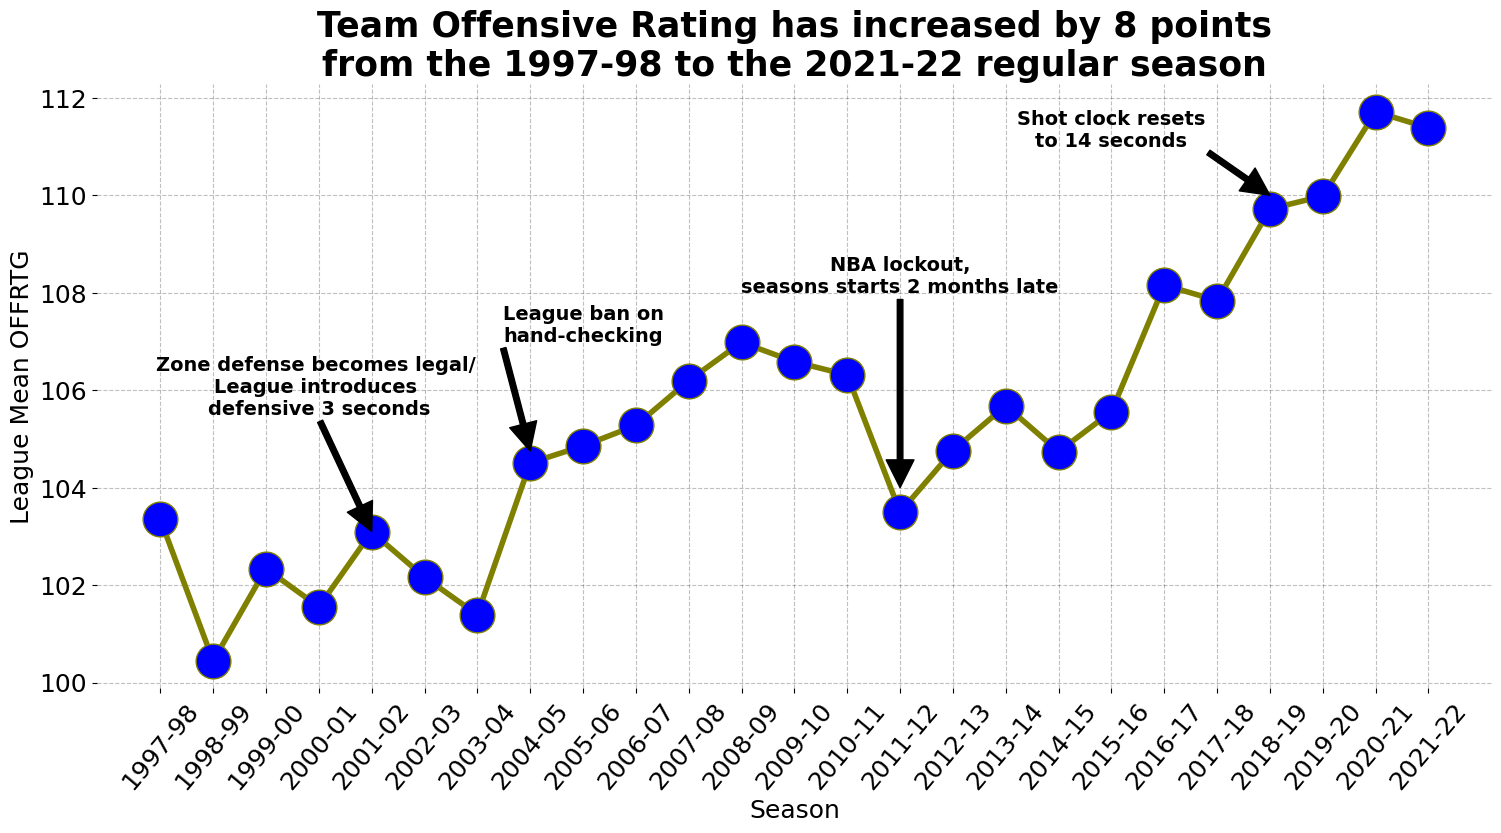

In [403]:
# graph to show mean offrtg from past 25 nba regular seasons
data = df_EfficiencyR2[['Mean OFFRTG']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)
plt.xlabel('Season', fontsize=18)
plt.ylabel('League Mean OFFRTG', fontsize=18)

plt.title('''Team Offensive Rating has increased by 8 points
from the 1997-98 to the 2021-22 regular season''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean OFFRTG', data=data, marker='o', markerfacecolor='blue', 
         markersize=25, color='olive', linewidth=4)

plt.annotate('''Shot clock resets
to 14 seconds'''
             , xy=('2018-19', 110), xytext=('2015-16', 111), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''NBA lockout,
seasons starts 2 months late'''
             , xy=('2011-12', 104), xytext=('2011-12', 108), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''League ban on
hand-checking'''
             , xy=('2004-05', 104.75), xytext=('2005-06', 107), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''Zone defense becomes legal/ 
League introduces 
defensive 3 seconds'''
             , xy=('2001-02', 103.1), xytext=('2000-01', 105.5), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.grid(linestyle='--', color='black', alpha=.25)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

#plt.savefig('line chart team Offensive rating from the past 25 NBA regular seasons.pdf',bbox_inches='tight')
plt.show()

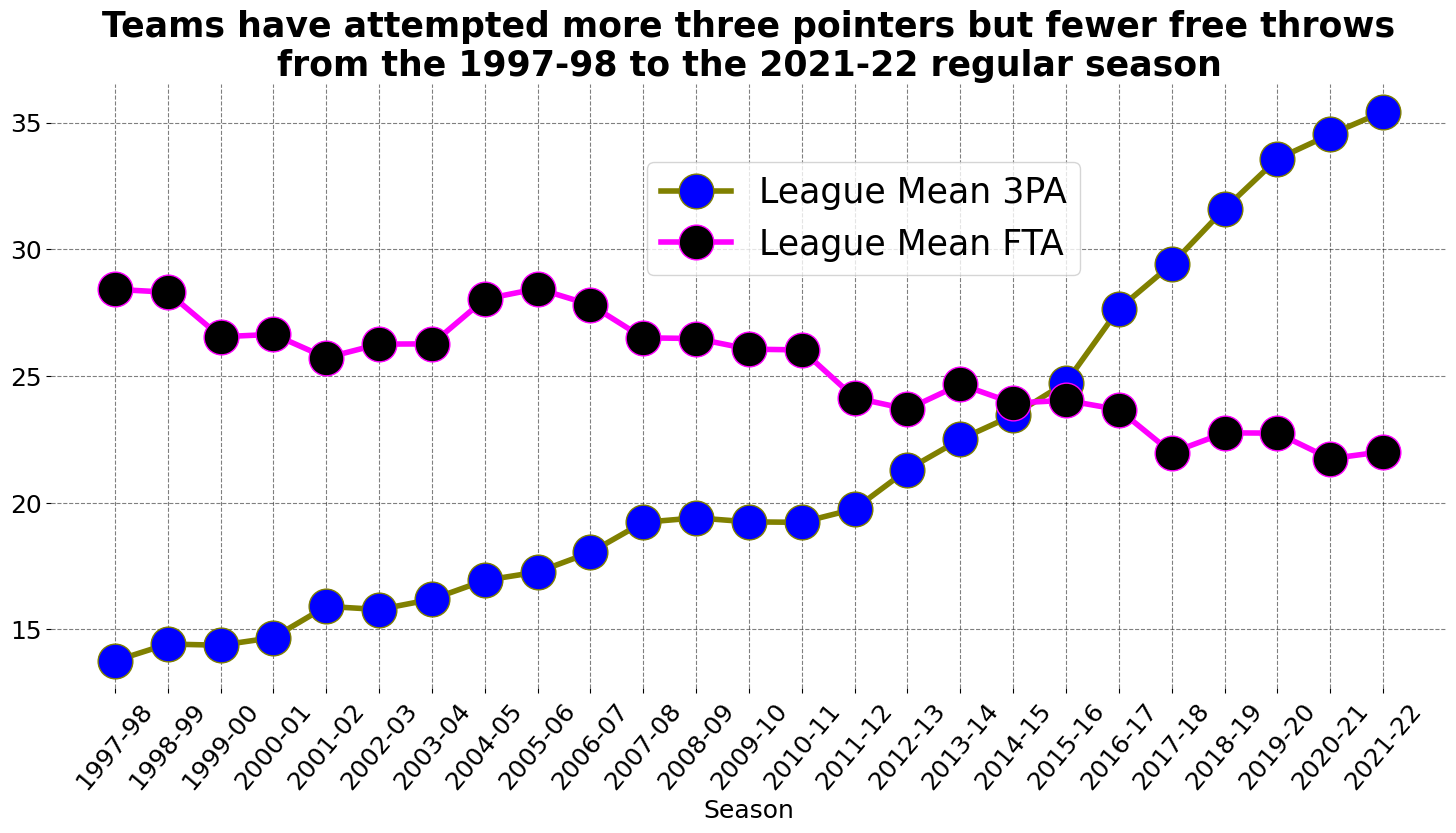

In [36]:
data = df_EfficiencyR2[['Mean 3PA', 'Mean FTA']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)

plt.xlabel('Season', fontsize=18)
plt.title('''Teams have attempted more three pointers but fewer free throws
from the 1997-98 to the 2021-22 regular season''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean 3PA', data=data, marker='o', markerfacecolor='blue', markersize=25, color='olive'
         , linewidth=4, label='League Mean 3PA')
plt.plot('Season', 'Mean FTA', data=data, marker='o', markerfacecolor='black', markersize=25, color='fuchsia'
         , linewidth=4, label='League Mean FTA')


plt.grid(linestyle='--', color='black', alpha=.5)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

plt.legend(bbox_to_anchor=[.75,.9],prop={'size': 25})

#plt.savefig('Team 3PAs and FTAs from the past 25 NBA regular seasons.pdf',bbox_inches='tight')
plt.show()



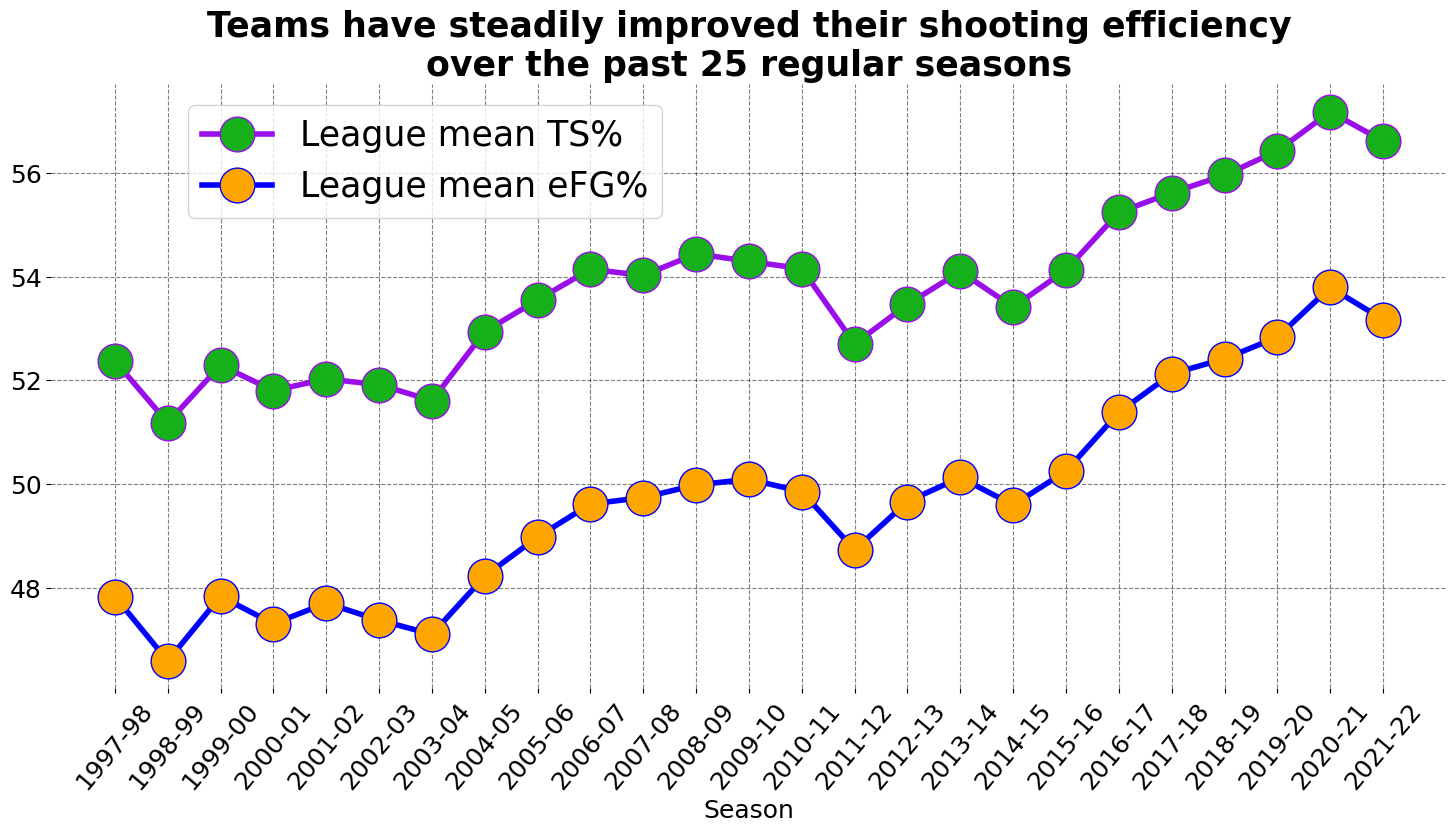

In [394]:
data = df_EfficiencyR2[['Mean eFG%', 'Mean TS%']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)
plt.xlabel('Season', fontsize=18)
plt.title('''Teams have steadily improved their shooting efficiency
over the past 25 regular seasons''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean TS%', data=data, marker='o', markerfacecolor='xkcd:green', 
         markersize=25, color='xkcd:violet'
         , linewidth=4, label='League mean TS%')

plt.plot('Season', 'Mean eFG%', data=data, marker='o', markerfacecolor='orange', 
         markersize=25, color='blue'
         , linewidth=4, label='League mean eFG%')


plt.grid(linestyle='--', color='black', alpha=.5)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

plt.legend(bbox_to_anchor=[.45,.75],prop={'size': 25})

#plt.savefig('Team TS% and eFG% from the past 25 NBA regular seasons.pdf',bbox_inches='tight')
plt.show()


### 2) What is the best metric that predicts winning in the NBA during the regular season?

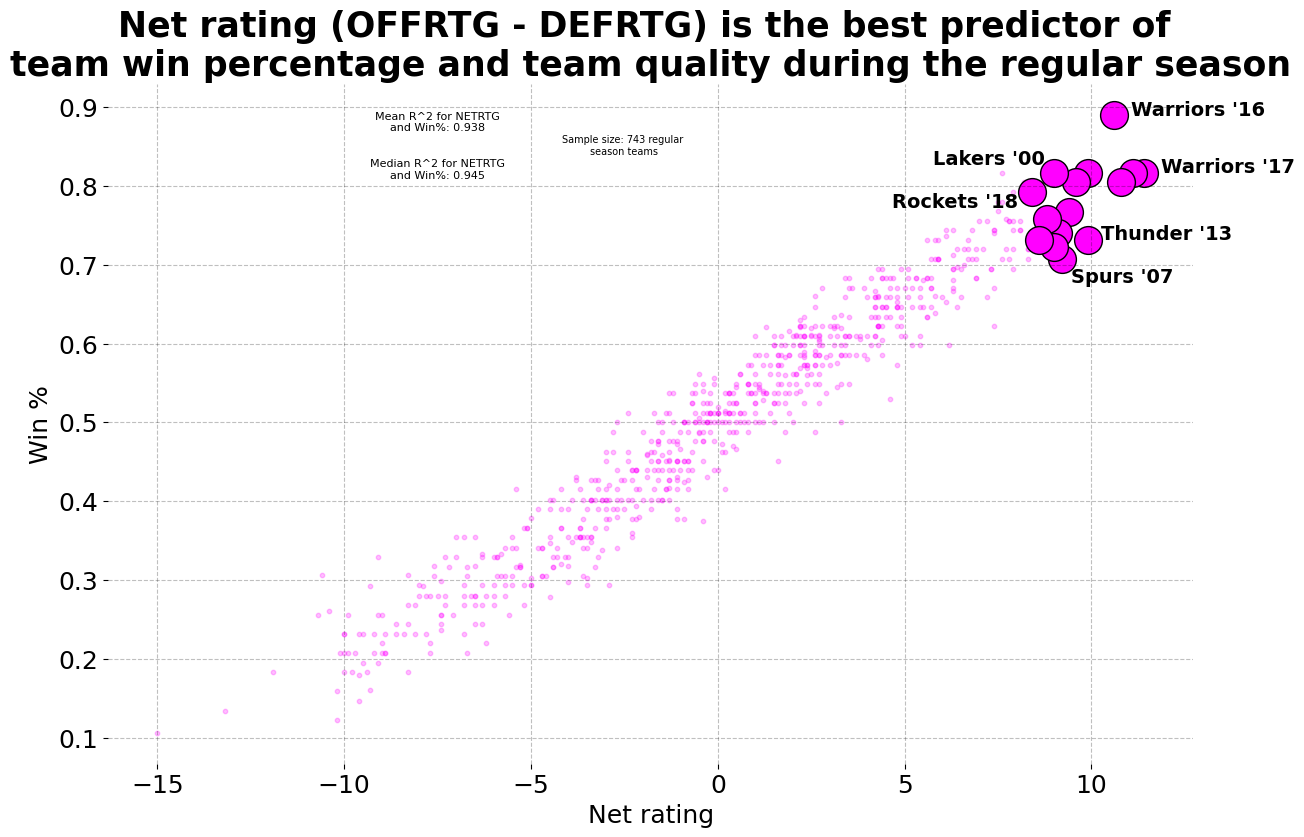

In [406]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','NETRTG','WIN%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('NETRTG', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0]) >= 8.4]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.4]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.4]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net rating', 
              xlabelsize=18, xticksize=18, ylabel='Win %', ylabelsize=18, yticksize=18, title = 
'''Net rating (OFFRTG - DEFRTG) is the best predictor of 
team win percentage and team quality during the regular season''', titlefontsize=25, marker='o', 
              scattercolor='fuchsia',df2=df2, s2=400
             )

plt.text(-7.5, .87 , 
'''Mean R^2 for NETRTG
and Win%: {value}'''.format(value = round(df_EfficiencyR2['R^2 of NETRTG and Win% for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-7.5, .81, 
'''Median R^2 for NETRTG
and Win%: {value}'''.format(value = round(df_EfficiencyR2['R^2 of NETRTG and Win% for Teams'].median(), 3)),
        ha='center', fontsize=8)

plt.text(11.4+.45, 0.817, "Warriors '17", fontsize=14, weight='bold')
plt.text(10.6+.45, 0.89, "Warriors '16", fontsize=14, weight='bold')
plt.text(9.9+.35, 0.732, "Thunder '13", fontsize=14, weight='bold')
plt.text(9.0-3.25, 0.817+.01, "Lakers '00", fontsize=14, weight='bold')
plt.text(8.4-3.75, 0.793-.02, "Rockets '18", fontsize=14, weight='bold')
plt.text(9.2+.25, 0.707-.03, "Spurs '07", fontsize=14, weight='bold')
plt.text(-2.5, .84, '''Sample size: 743 regular 
season teams''', ha='center', fontsize=7)
#plt.savefig('net rating is the best predictor of winning and team quality.pdf', bbox_inches='tight')
plt.show()

### 3) What is the relationship between offensive rating/defensive rating and team quality in the NBA during the regular season?

In [721]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('WIN%', ascending=False).iloc[0:4][['TEAM','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)

df1['Better on Offense or Defense?'] = ['Defense', 'Offense', 'Defense', 'Defense', 
'Offense', 'Defense', 'Offense', 'Offense', 
'Offense', 'Defense', 'Defense', 'Defense', 
'Offense', 'Offense', 'Defense', 'Defense',
'Defense', 'Offense', 'Offense', 'Offense', 
'Offense', 'Offense', 'Offense', 'Defense',
'Offense', 'Offense', 'Defense', 'Offense', 
'Offense', 'Offense', 'Defense', 'Offense',
'Defense', 'Offense', 'Offense', 'Defense', 
'Offense', 'Offense', 'Offense', 'Defense',
'Defense', 'Defense', 'Offense', 'Offense', 
'Defense', 'Defense', 'Offense', 'Offense',
'Offense', 'Defense', 'Defense', 'Offense', 
'Defense', 'Defense', 'Offense', 'Defense',
'Defense', 'Defense', 'Offense', 'Offense', 
'Offense', 'Defense', 'Offense', 'Defense',
'Offense', 'Offense', 'Offense', 'Defense', 
'Offense', 'Offense', 'Offense', 'Defense',
'Defense', 'Offense', 'Defense', 'Defense', 
'Offense', 'Offense', 'Defense', 'Defense',
'Offense', 'Offense', 'Offense', 'Defense', 
'Offense', 'Defense', 'Defense', 'Defense',
'Offense', 'Defense', 'Offense', 'Offense', 
'Defense', 'Defense', 'Defense', 'Offense',
'Defense', 'Offense', 'Offense', 'Offense']

df1.head()

,TEAM,Net OFFRTG from league average,Net DEFRTG from league average,Better on Offense or Defense?
0,Golden State Warriors '22,0.716667,-4.760000,Defense
1,Memphis Grizzlies '22,2.916667,-2.460000,Offense
2,Miami Heat '22,1.616667,-2.960000,Defense
3,Phoenix Suns '22,2.816667,-4.560000,Defense
4,Brooklyn Nets '21,5.586667,1.403333,Offense


In [722]:
# top 4 teams from 1997-2021 regs
count_top4s = df1.groupby('Better on Offense or Defense?').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
count_top4s

,Better on Offense or Defense?,counts
1,Offense,55
0,Defense,45


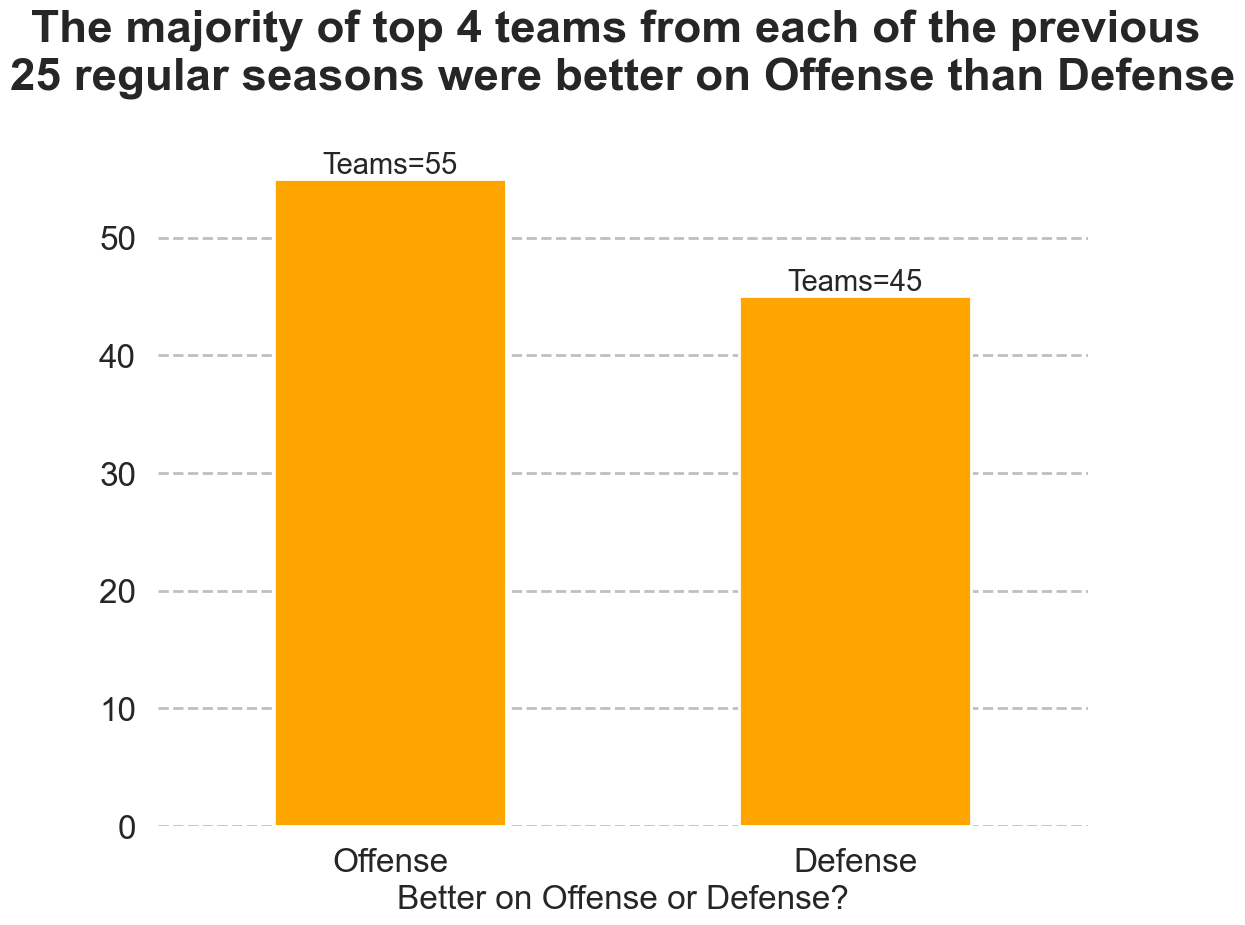

In [723]:
plt.figure(figsize=(12,9), dpi=100)
df1['Better on Offense or Defense?'].value_counts().plot.bar(color='orange')

yticks=plt.yticks(fontsize=24)
xticks = plt.xticks(fontsize=24, rotation=0)

plt.title('''The majority of top 4 teams from each of the previous 
25 regular seasons were better on Offense than Defense
''', fontsize=33, weight='bold')

plt.xlabel('Better on Offense or Defense?', fontsize=24)
plt.grid(ls='--', axis='y', alpha=.25, color='black')

for i in range(len(count_top4s.values)):
        plt.text(i, count_top4s.iloc[i,1]+.5, 
                 'Teams' + '=' + str(count_top4s.iloc[i,1]), ha='center',
                fontsize=21)
plt.box()
#plt.savefig('top 4 regular season offense vs. defense.pdf',bbox_inches='tight')
plt.show()

In [39]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('WIN%', ascending=False).iloc[0:1][['TEAM', 'WIN%','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average','NETRTG',
                                                                               'EFG%', 'TS%']]
    variable2 = df.reset_index().sort_values('WIN%', ascending=True).iloc[0:1][['TEAM', 'WIN%','Net OFFRTG from league average',
                                                                           'Net DEFRTG from league average','NETRTG',
                                                                           'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable['WIN%'] = variable['WIN%'] * 100
    variable['Best or worst team that season?'] = 'Best'
    variable2['TEAM'] = variable2['TEAM'] + ' \'' + str(x)[-2:]
    variable2['WIN%'] = variable2['WIN%'] * 100
    variable2['Best or worst team that season?'] = 'Worst'
    variable.sort_values('TEAM', ascending=True, inplace=True)
    variable2.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    lst.append(variable2)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
df1.head()

,WIN%,Net OFFRTG from league average,Net DEFRTG from league average,NETRTG,EFG%,TS%,Best or worst team that season?
TEAM,,,,,,,
Phoenix Suns '22,78.0,2.816667,-4.560000,7.5,54.9,58.1,Best
Houston Rockets '22,24.4,-3.283333,5.040000,-8.3,53.4,56.5,Worst
Utah Jazz '21,72.2,4.786667,-4.196667,9.0,56.3,59.7,Best
Houston Rockets '21,23.6,-4.713333,2.703333,-7.4,52.1,55.3,Worst
Milwaukee Bucks '20,76.7,1.916667,-7.653333,9.4,55.2,58.3,Best


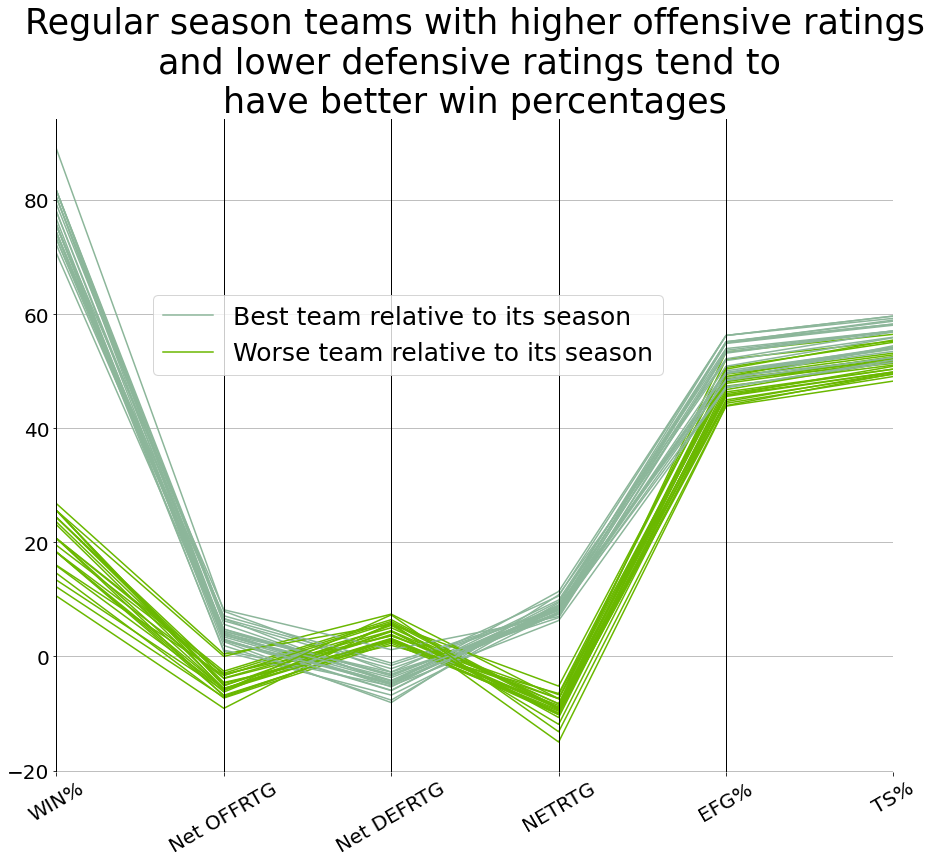

In [42]:
plt.figure(figsize=(15,12))
pcp(df1, 'Best or worst team that season?')
xticks = plt.xticks()
plt.xticks(fontsize=20, rotation=30, ticks = [0,1,2,3,4,5], labels = ['WIN%', 'Net OFFRTG', 'Net DEFRTG', 'NETRTG', 'EFG%', 'TS%'])
plt.yticks(fontsize=20, rotation=0)
plt.title('''Regular season teams with higher offensive ratings
and lower defensive ratings tend to 
have better win percentages''', fontsize=35)
handles, labels = plt.gca().get_legend_handles_labels()

labels = ['Best team relative to its season', 'Worse team relative to its season']

order = [0,1]

plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=[.1,.75],
           prop={'size': 25})

plt.box()

#plt.savefig('Parallel coordinates plot past 25 regular seasons.pdf', bbox_inches='tight')
plt.show()

### 4) How much has the relationships between offensive/defensive rating and team quality changed throughout the years?

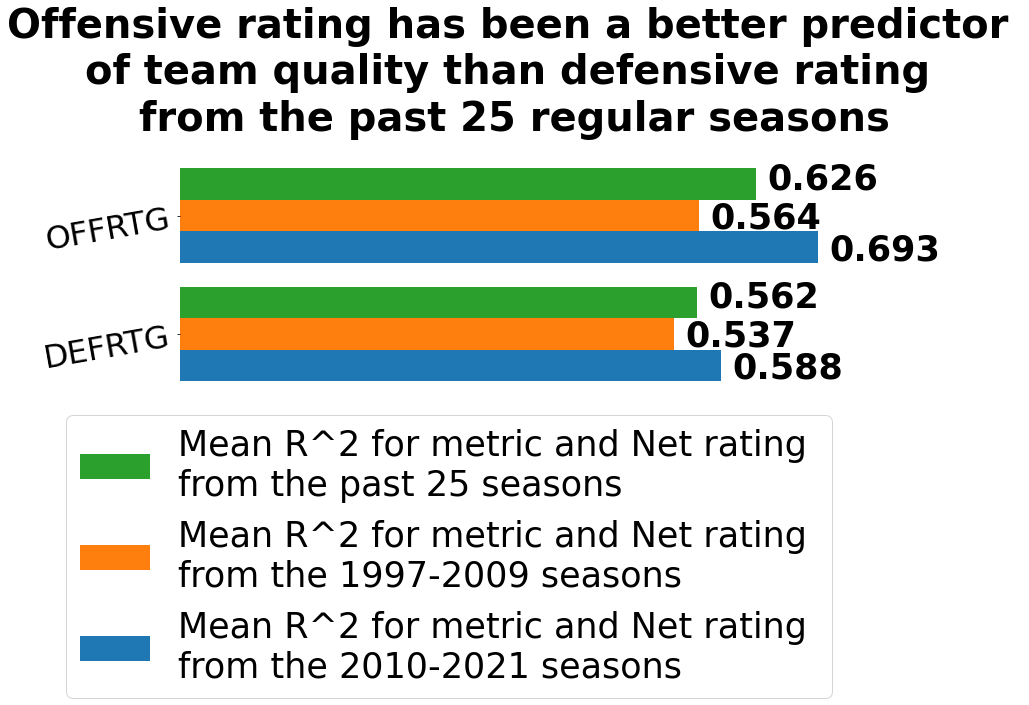

In [166]:
Metrics = pd.DataFrame({
    'Metric being correlated with NETRTG': ['OFFRTG', 'DEFRTG'],
    
    'Mean R^2 from the past 25 regular season': 
                                [df_EfficiencyR2['R^2 of OFFRTG and NETRTG for Teams'].mean(),
                                df_EfficiencyR2['R^2 of DEFRTG and NETRTG for Teams'].mean()],
    'Mean R^2 from the 1997-2009 seasons':
                                [Efficiency1997_2009['R^2 of OFFRTG and NETRTG for Teams'].mean(),
                                Efficiency1997_2009['R^2 of DEFRTG and NETRTG for Teams'].mean()],
    'Mean R^2 from the 2010-2021 seasons':
    [Efficiency2010_2021['R^2 of OFFRTG and NETRTG for Teams'].mean(),
Efficiency2010_2021['R^2 of DEFRTG and NETRTG for Teams'].mean()]
    
})

Metrics.set_index('Metric being correlated with NETRTG', inplace=True)

Metrics = Metrics.iloc[:,[2,1,0]]

Metrics

CreateTripleBarH(Metrics, figsize=(12,5), title= 
'''Offensive rating has been a better predictor 
of team quality than defensive rating 
from the past 25 regular seasons''', titlefontsize=40, xticksize=32, 
           yticksize=32, ytickrotate=10, 
           upperbarshiftup=.225, lowerbarshiftdown=.375,
           shiftupperbarleft=-.0725, shiftlowerbarleft=-.0725, textbarfontsize=35, textbarcolor='black', 
            legend_labels= 
['''Mean R^2 for metric and Net rating 
from the 2010-2021 seasons''', '''Mean R^2 for metric and Net rating 
from the 1997-2009 seasons''', '''Mean R^2 for metric and Net rating 
from the past 25 seasons'''], legend_order=[2,1,0], legend_pos=[1,.05], width=.8, legend_size=35, middlebarshiftup=-.1,
                shiftmiddlebarleft=-.0725 
          )

plt.xticks([])

#plt.savefig('Offensive rating is a better predictor of team quality than defensive rating.pdf', bbox_inches='tight')
plt.show()

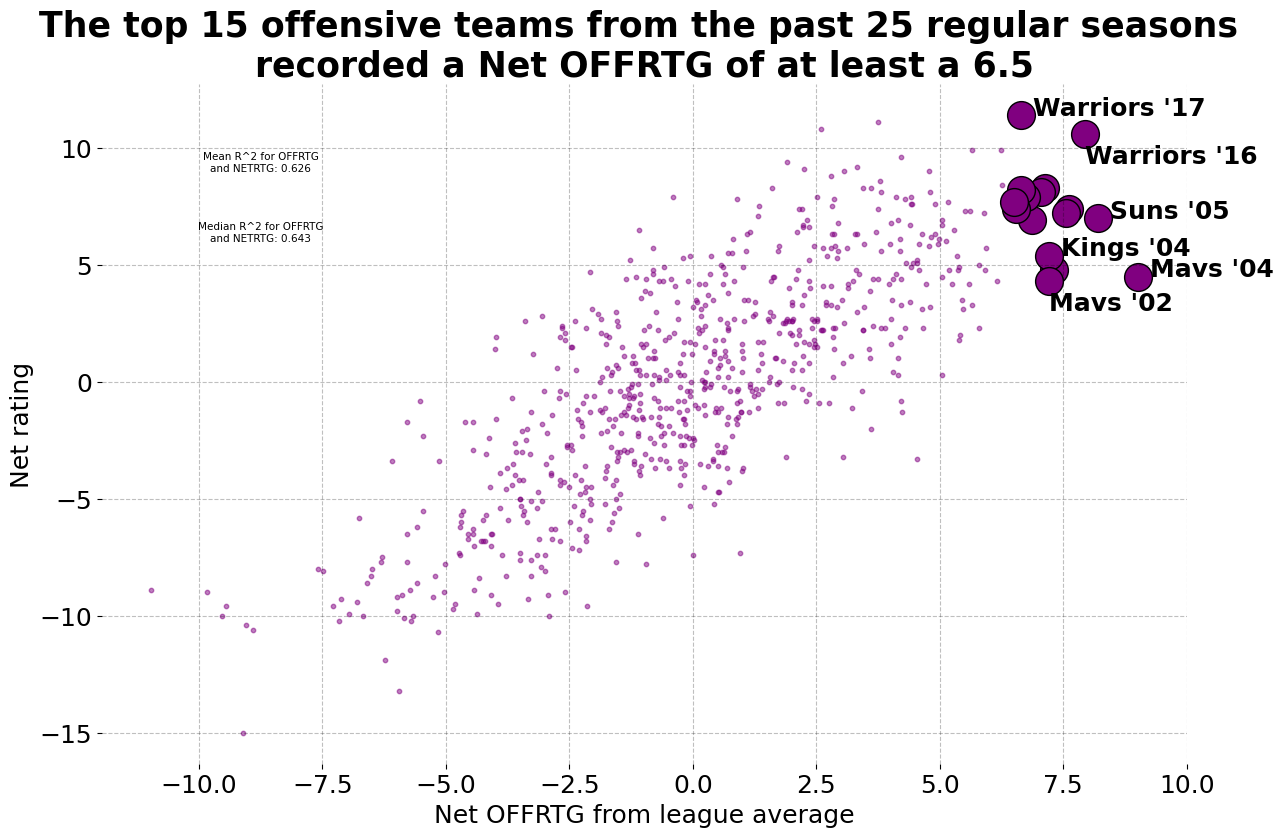

In [109]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.5]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.5]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.5]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.5, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', 
              xlabelsize=18, xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title = 
'''The top 15 offensive teams from the past 25 regular seasons 
recorded a Net OFFRTG of at least a 6.5''', titlefontsize=25, marker='o', 
              scattercolor='purple',df2=df2, s2=400
             )

plt.text(9.00689655172414+.25, 4.5, "Mavs '04", fontsize=18, weight='bold')
plt.text(8.193333333333314+.25, 7.0, "Suns '05", fontsize=18, weight='bold')
plt.text(7.9399999999999835, 10.6-1.25, "Warriors '16", fontsize=18, weight='bold')
plt.text(7.206896551724128+.25, 5.4, "Kings '04", fontsize=18, weight='bold')
plt.text(7.206896551724114, 4.3-1.25, "Mavs '02", fontsize=18, weight='bold')
plt.text(6.643333333333331+.25, 11.4, "Warriors '17", fontsize=18, weight='bold')

plt.text(-8.75, 9 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-8.75, 6 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)
#plt.savefig('top offensive teams past 25 regular seasons.pdf', bbox_inches='tight')
plt.show()

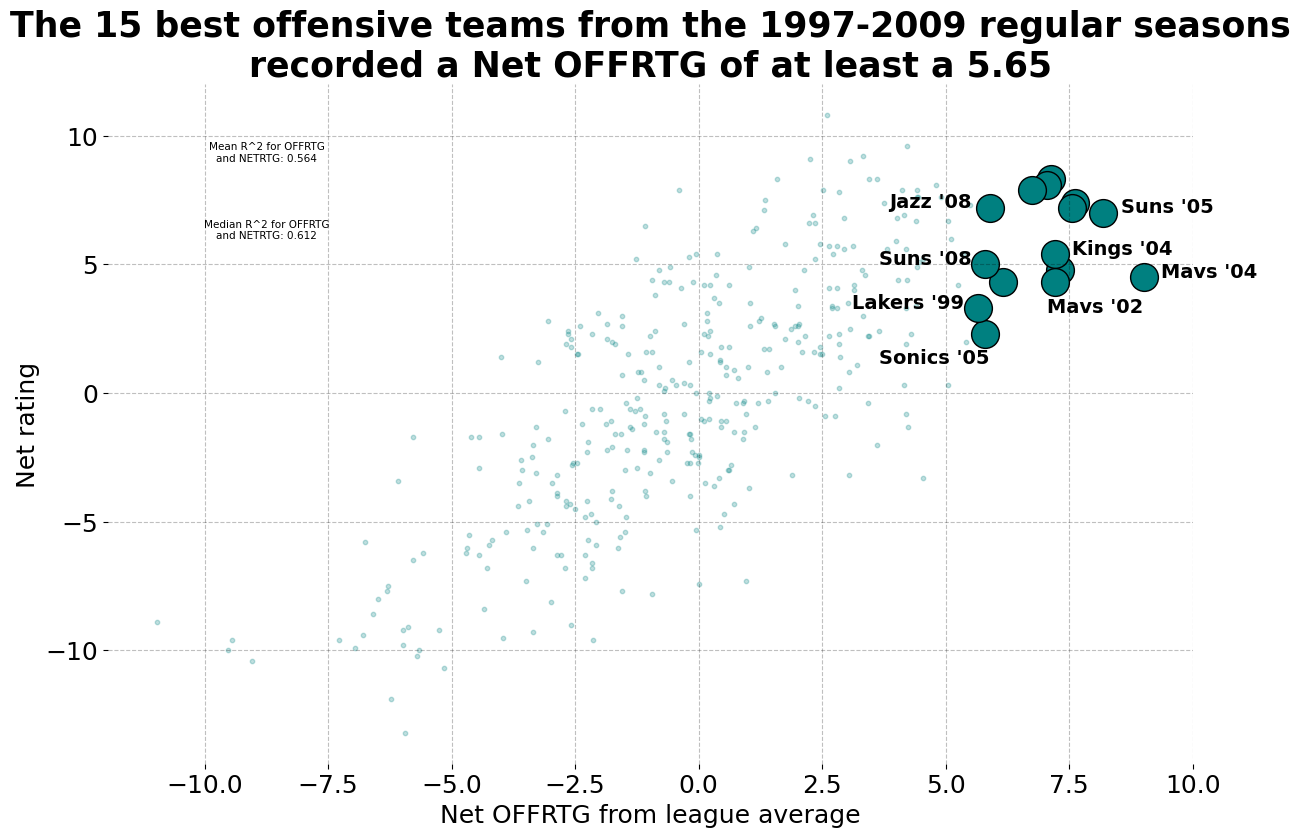

In [167]:
x = 2010
lst = []
for df in teams_97_09:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.65]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.65]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.65]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title= 
'''The 15 best offensive teams from the 1997-2009 regular seasons
recorded a Net OFFRTG of at least a 5.65''', titlefontsize=25, marker='o', 
scattercolor='teal', df2=df2, s2=400
             )

plt.text(-8.75, 9 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-8.75, 6 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(9.00689655172414+.35, 4.5, "Mavs '04", fontsize=14, weight='bold')
plt.text(8.193333333333314+.35, 7.0, "Suns '05", fontsize=14, weight='bold')
plt.text(7.206896551724128+.35, 5.4, "Kings '04", fontsize=14, weight='bold')
plt.text(7.206896551724114-.15, 4.3-1.15, "Mavs '02", fontsize=14, weight='bold')
plt.text(5.903333333333322-2.05, 7.2, "Jazz '08", fontsize=14, weight='bold')
plt.text(5.8033333333333275-2.15, 5.0, "Suns '08", fontsize=14, weight='bold')
plt.text(5.793333333333308-2.15, 2.3-1.15, "Sonics '05", fontsize=14, weight='bold')
plt.text(5.65517241379311-2.55, 3.3, "Lakers '99", fontsize=14, weight='bold')

#plt.savefig('top offensive teams 1997-2009 regular seasons.pdf', bbox_inches='tight')
plt.show()

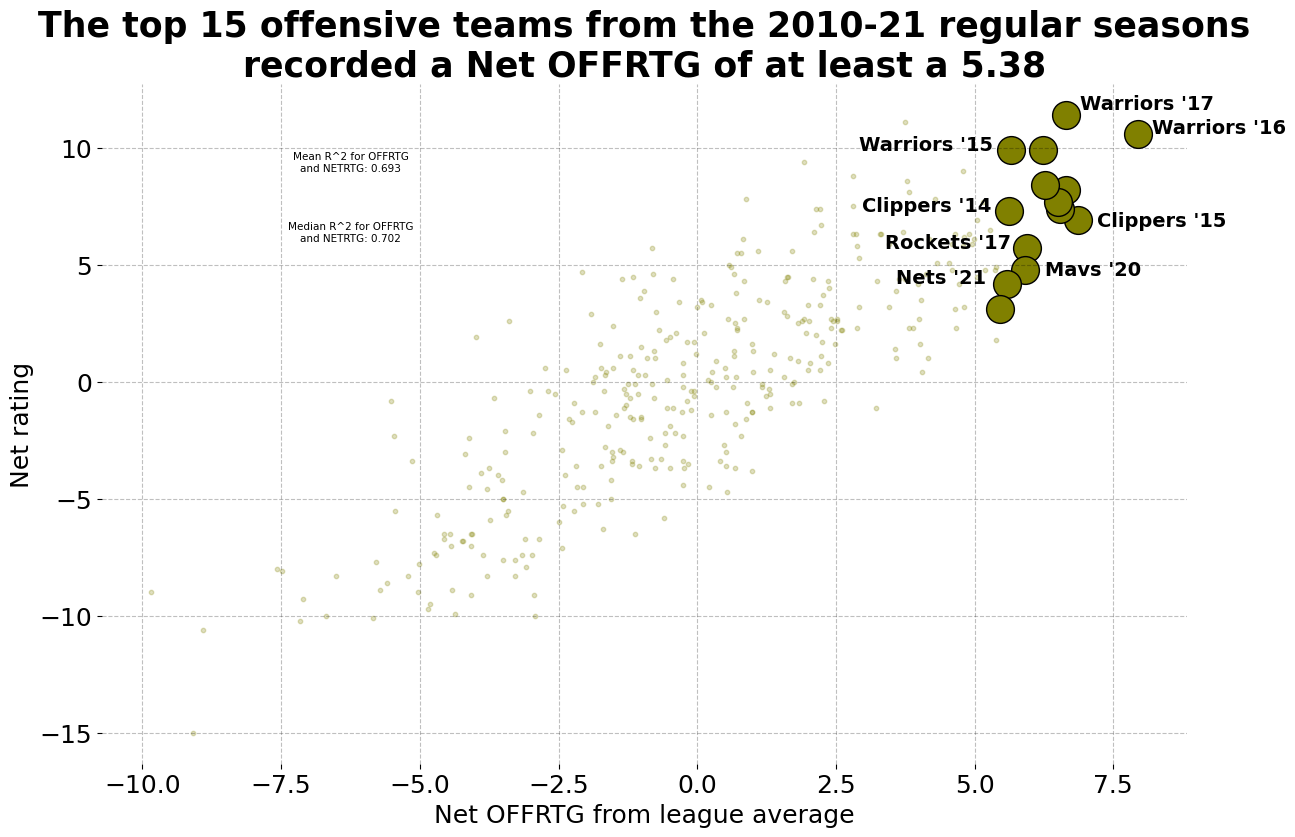

In [165]:
x = 2022
lst = []
for df in teams_10_21:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.386667]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.386667]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 5.386667]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title= 
'''The top 15 offensive teams from the 2010-21 regular seasons
recorded a Net OFFRTG of at least a 5.38''', titlefontsize=25, marker='o', 
              scattercolor='olive', df2=df2, s2=400
             )

plt.text(-6.25, 9 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-6.25, 6 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

#plt.savefig('top offensive teams 2010-2021 regular seasons.pdf', bbox_inches='tight')
#plt.show()

plt.text(7.9399999999999835+.25, 10.6, "Warriors '16", fontsize=14, weight='bold')
plt.text(6.860000000000028+.35, 6.9-.25, "Clippers '15", fontsize=14, weight='bold')
plt.text(6.643333333333331+.25, 11.4+.25, "Warriors '17", fontsize=14, weight='bold')
plt.text(5.943333333333328-2.55, 5.7, "Rockets '17", fontsize=14, weight='bold')
plt.text(5.916666666666671+.35, 4.8-.25, "Mavs '20", fontsize=14, weight='bold')
plt.text(5.660000000000039-2.75, 9.9, "Warriors '15", fontsize=14, weight='bold')
plt.text(5.616666666666646-2.65, 7.3, "Clippers '14", fontsize=14, weight='bold')
plt.text(5.586666666666673-2, 4.2, "Nets '21", fontsize=14, weight='bold')

#plt.savefig('top offensive teams 2010-2021 regular seasons.pdf', bbox_inches='tight')
plt.show()

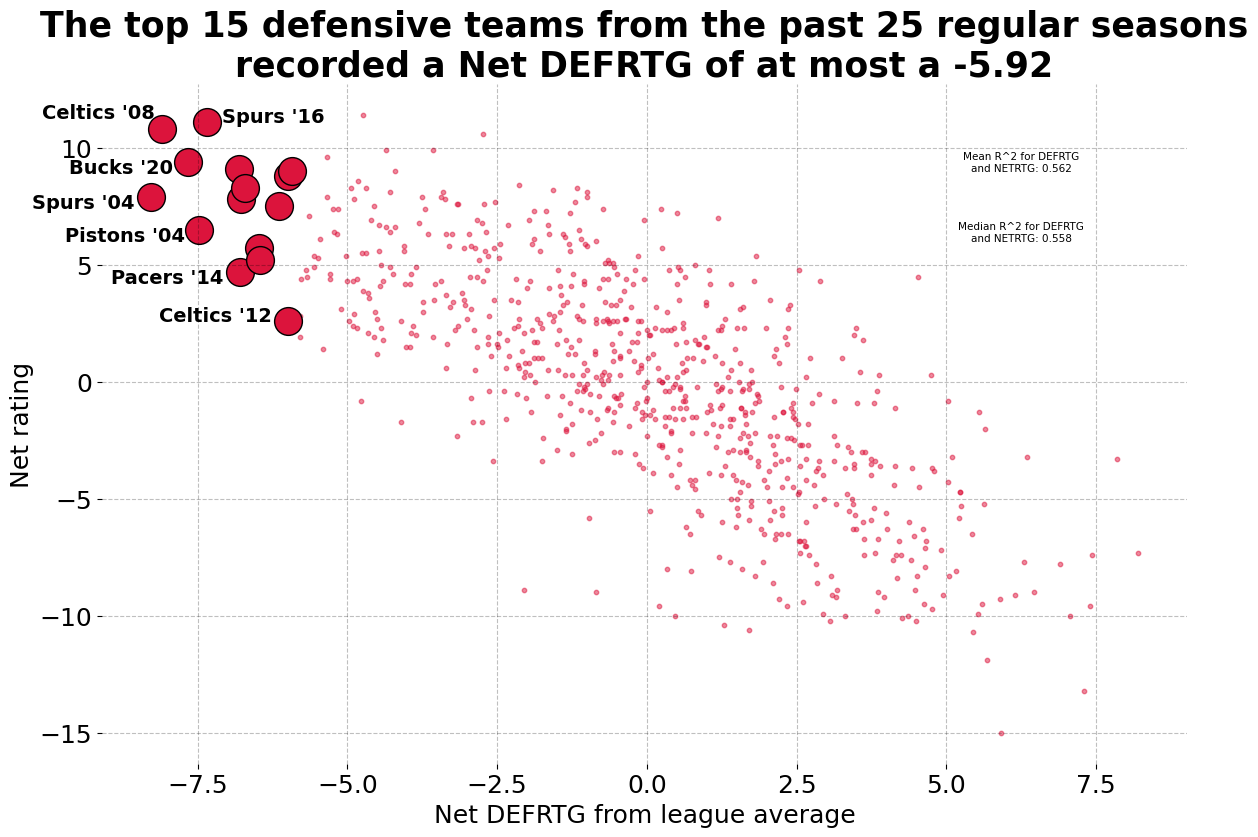

In [213]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.927586]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.927586]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.927586]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.5, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the past 25 regular seasons
recorded a Net DEFRTG of at most a -5.92''', titlefontsize=25, marker='o', scattercolor='crimson', df2=df2, s2=400
             )

plt.text(6.25, 9 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(6.25, 6 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(-8.27241379310344-2, 7.9-.5, "Spurs '04", fontsize=14, weight='bold')
plt.text(-8.090000000000018-2, 10.8+.45, "Celtics '08", fontsize=14, weight='bold')
plt.text(-7.653333333333336-2, 9.4-.5, "Bucks '20", fontsize=14, weight='bold')
plt.text(-7.472413793103428-2.25, 6.5-.5, "Pistons '04", fontsize=14, weight='bold')
plt.text(-7.336666666666659+.25, 11.1, "Spurs '16", fontsize=14, weight='bold')
plt.text(-6.789999999999992-2.15, 4.7-.5, "Pacers '14", fontsize=14, weight='bold')
plt.text(-5.993333333333311-2.15, 2.6, "Celtics '12", fontsize=14, weight='bold')

#plt.savefig('top defensive teams past 25 regular seasons.pdf', bbox_inches='tight')
plt.show()

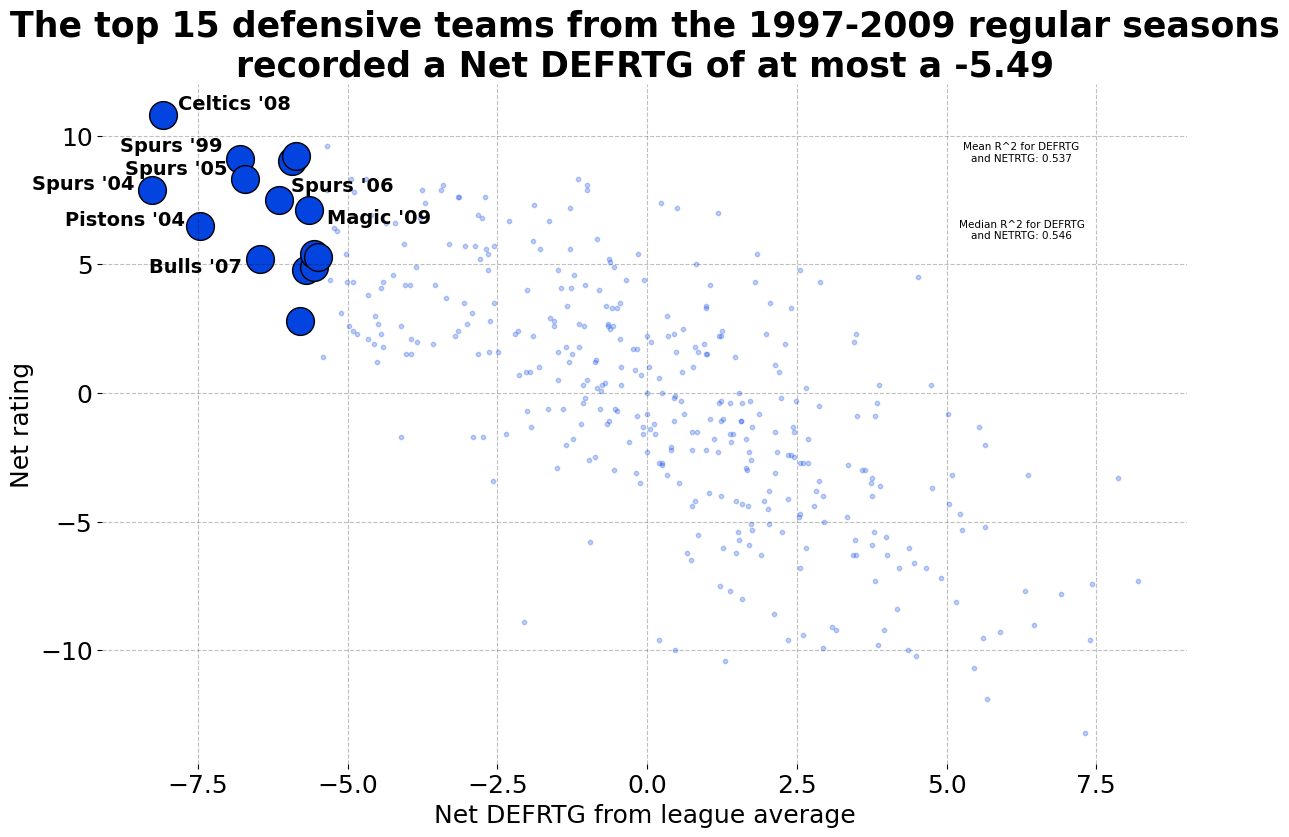

In [272]:
x = 2010
lst = []
for df in teams_97_09:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.49]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.49]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -5.49]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the 1997-2009 regular seasons
recorded a Net DEFRTG of at most a -5.49''', titlefontsize=25, marker='o', scattercolor='xkcd:blue', df2=df2, s2=400
             )

plt.text(6.25, 9 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(6.25, 6 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(-8.27241379310344-2, 7.9, "Spurs '04", fontsize=14, weight='bold')
plt.text(-8.090000000000018+.25, 10.8+.2, "Celtics '08", fontsize=14, weight='bold')
plt.text(-7.472413793103428-2.25, 6.5, "Pistons '04", fontsize=14, weight='bold')
plt.text(-6.803448275862053-2, 9.1+.3, "Spurs '99", fontsize=14, weight='bold')
plt.text(-6.709999999999994-2, 8.3+.2, "Spurs '05", fontsize=14, weight='bold')
plt.text(-6.463333333333338-1.85, 5.2-.5, "Bulls '07", fontsize=14, weight='bold')
plt.text(-6.146666666666661+.2, 7.5+.35, "Spurs '06", fontsize=14, weight='bold')
plt.text(-5.640000000000015+.3, 7.1-.5, "Magic '09", fontsize=14, weight='bold')

#plt.savefig('top defensive teams 1997-2009 regular seasons.pdf', bbox_inches='tight')
plt.show()

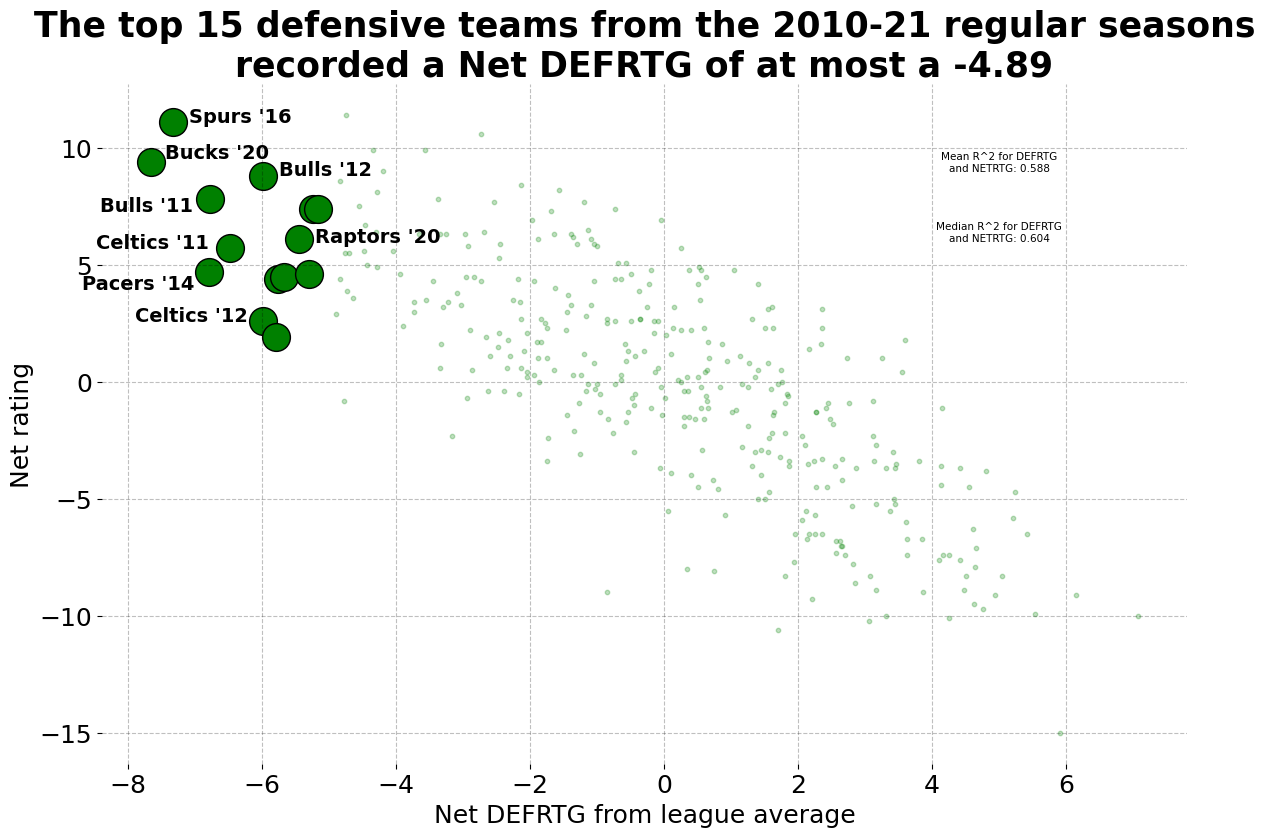

In [313]:
x = 2022
lst = []
for df in teams_10_21:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -4.896667]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -4.896667]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -4.896667]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the 2010-21 regular seasons
recorded a Net DEFRTG of at most a -4.89''', titlefontsize=25, marker='o', scattercolor='green', df2=df2, s2=400
             )

plt.text(5, 9 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(5, 6 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(-7.653333333333336+.2, 9.4+.15, "Bucks '20", fontsize=14, weight='bold')
plt.text(-7.336666666666659+.25, 11.1, "Spurs '16", fontsize=14, weight='bold')
plt.text(-6.789999999999992-1.9, 4.7-.75, "Pacers '14", fontsize=14, weight='bold')
plt.text(-6.776666666666685-1.65, 7.8-.5, "Bulls '11", fontsize=14, weight='bold')
plt.text(-6.476666666666688-2, 5.7, "Celtics '11", fontsize=14, weight='bold')
plt.text(-5.993333333333311+.25, 8.8, "Bulls '12", fontsize=14, weight='bold')
plt.text(-5.993333333333311-1.9, 2.6, "Celtics '12", fontsize=14, weight='bold')
plt.text(-5.453333333333333+.25, 6.1-.15, "Raptors '20", fontsize=14, weight='bold')

#plt.savefig('top defensive teams 2010-2021 regular seasons.pdf', bbox_inches='tight')
plt.show()

### 5) What is the best metric that predicts offensive rating in the NBA during the regular season?

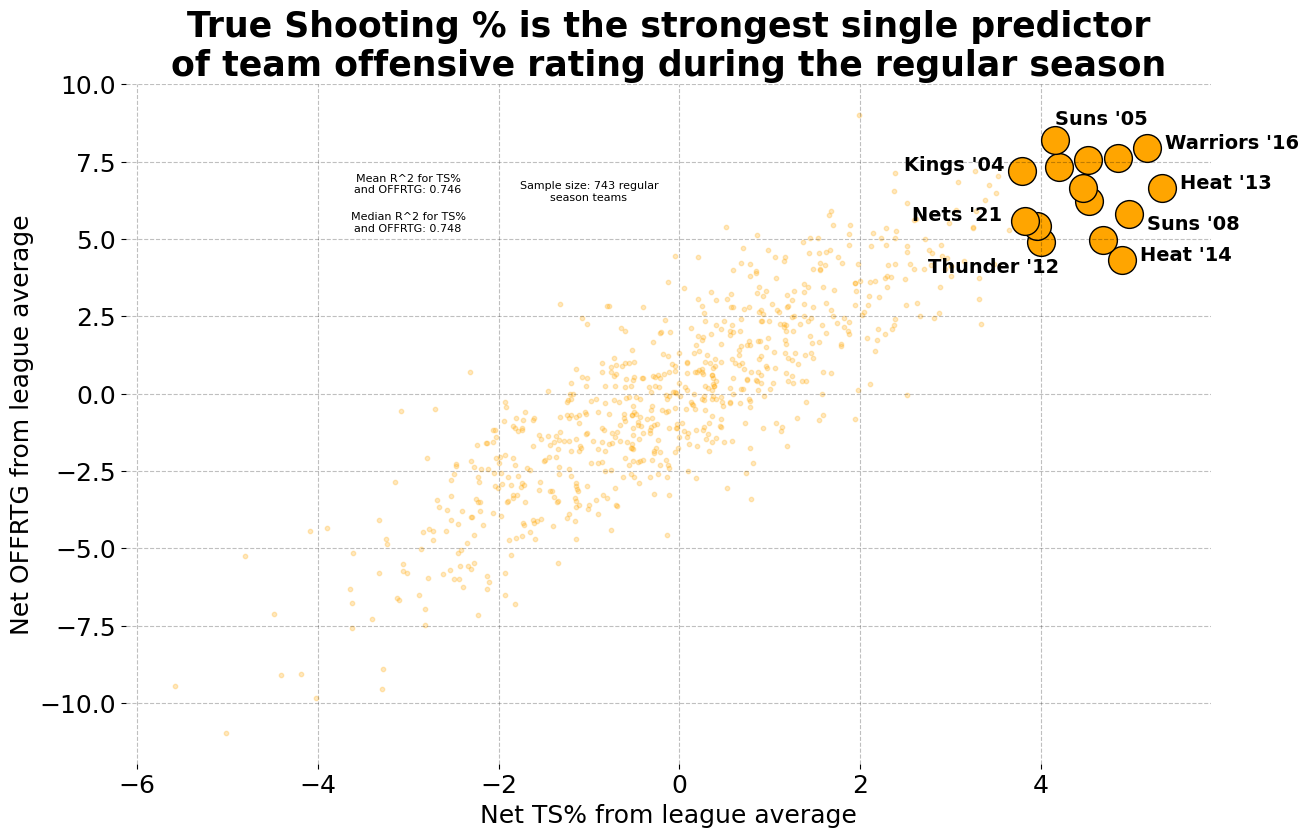

In [474]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.789655]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.789655]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.789655]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net TS% from league average',
              xlabelsize=18, xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18,
              yticksize=18, title=
'''True Shooting % is the strongest single predictor
of team offensive rating during the regular season''', titlefontsize=25, marker='o', scattercolor='orange', 
              df2=df2, s2=400
             )
plt.text(-3, 6.5, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(df_EfficiencyR2['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)
plt.text(-1, 6.25, '''Sample size: 743 regular
season teams''', ha='center', fontsize=8)
plt.text(5.333333333333329+.2, 6.639999999999986, "Heat '13", fontsize=14, weight='bold')
plt.text(5.169999999999995+.2, 7.9399999999999835, "Warriors '16", fontsize=14, weight='bold')
plt.text(4.976666666666674+.2, 5.8033333333333275-.5, "Suns '08", fontsize=14, weight='bold')
plt.text(4.900000000000013+.2, 4.316666666666649, "Heat '14", fontsize=14, weight='bold')
plt.text(4.160000000000011, 8.193333333333314+.5, "Suns '05", fontsize=14, weight='bold')
plt.text(3.996666666666677-1.25, 4.90333333333335-1, "Thunder '12", fontsize=14, weight='bold')
plt.text(3.8199999999999791-1.25, 5.586666666666673, "Nets '21", fontsize=14, weight='bold')
plt.text(3.789655172413781-1.3, 7.206896551724128, "Kings '04", fontsize=14, weight='bold')
#plt.savefig('TS% is the strongest single predictor of OFFRTG.pdf', bbox_inches='tight')
plt.show()

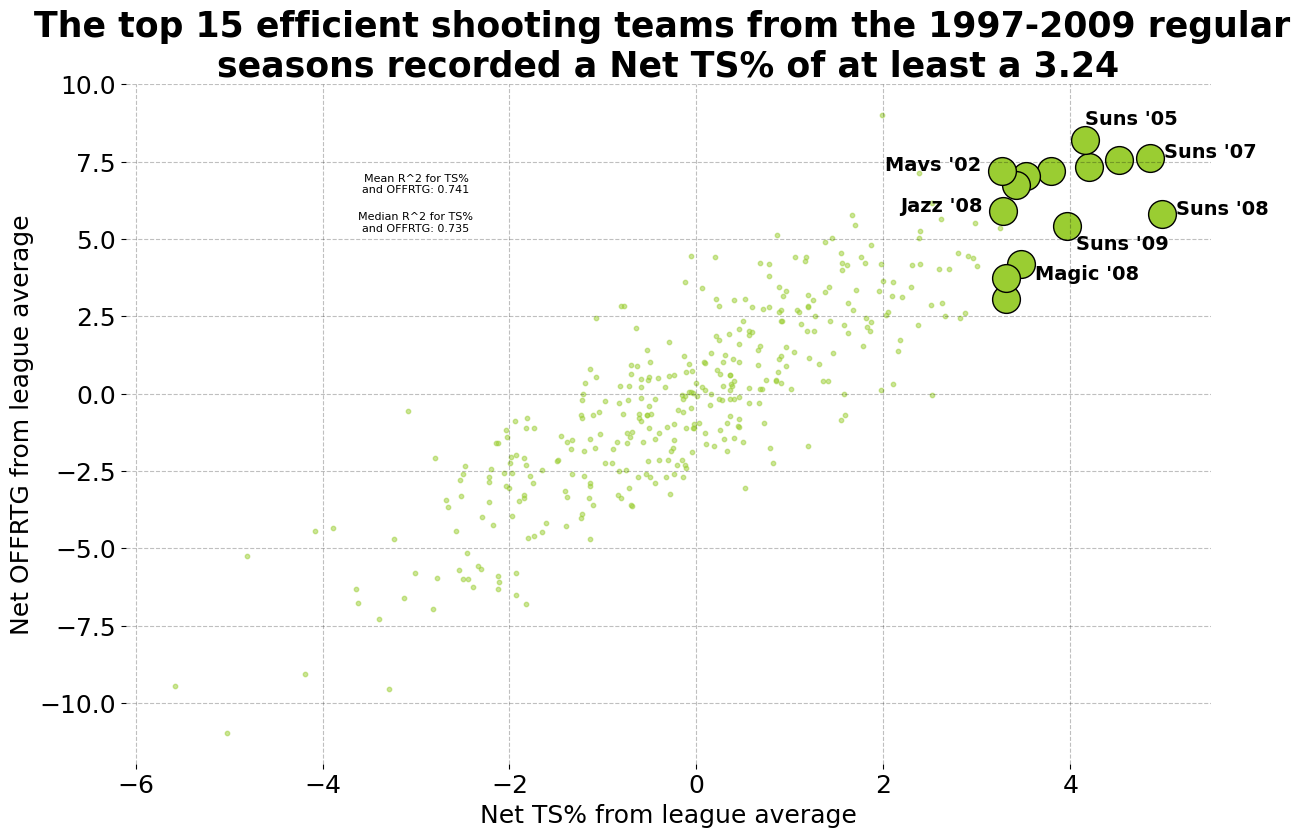

In [546]:
x = 2010
lst = []
for df in teams_97_09:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.246667]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.246667]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.246667]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.5, figsize=(14,9), dpi=100, xlabel='Net TS% from league average', xlabelsize=18,
              xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18, yticksize=18, title = 
'''The top 15 efficient shooting teams from the 1997-2009 regular 
seasons recorded a Net TS% of at least a 3.24''', titlefontsize=25, marker='o', 
              scattercolor='yellowgreen',df2=df2, s2=400
             )

plt.text(-3, 6.5, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency1997_2009['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)

plt.text(4.976666666666674+.15, 5.8033333333333275, "Suns '08", fontsize=14, weight='bold')
plt.text(4.856666666666662+.15, 7.623333333333335, "Suns '07", fontsize=14, weight='bold')
plt.text(4.160000000000011, 8.193333333333314+.5, "Suns '05", fontsize=14, weight='bold')
plt.text(3.9599999999999866+.1, 5.416666666666657-.75, "Suns '09", fontsize=14, weight='bold')
plt.text(3.4766666666666737+.15, 4.203333333333333-.5, "Magic '08", fontsize=14, weight='bold')
plt.text(3.276666666666671-1.1, 5.903333333333322, "Jazz '08", fontsize=14, weight='bold')
plt.text(3.272413793103439-1.25, 7.206896551724114, "Mavs '02", fontsize=14, weight='bold')

#plt.savefig('top 15 efficient shooting teams from 1997-2009 regular seasons.pdf', bbox_inches='tight')
plt.show()

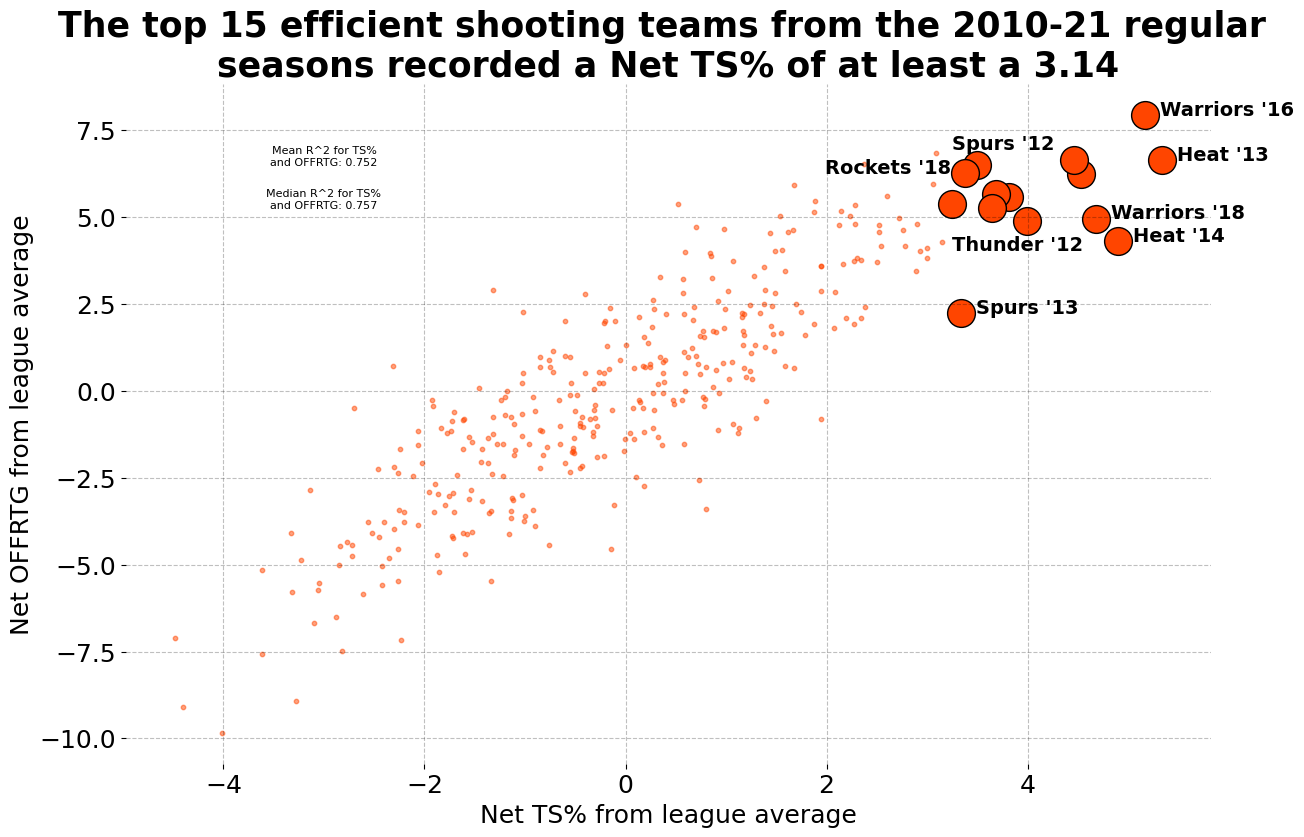

In [548]:
x = 2022
lst = []
for df in teams_10_21:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.146667]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.146667]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.146667]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.5, figsize=(14,9), dpi=100, xlabel='Net TS% from league average', xlabelsize=18,
              xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18, yticksize=18, title = 
'''The top 15 efficient shooting teams from the 2010-21 regular 
seasons recorded a Net TS% of at least a 3.14''', titlefontsize=25, marker='o', 
              scattercolor='orangered',df2=df2, s2=400
             )

plt.text(-3, 6.5, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency2010_2021['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)

plt.text(5.333333333333329+.15, 6.639999999999986, "Heat '13", fontsize=14, weight='bold')
plt.text(5.169999999999995+.15, 7.9399999999999835, "Warriors '16", fontsize=14, weight='bold')
plt.text(4.900000000000013+.15, 4.316666666666649, "Heat '14", fontsize=14, weight='bold')
plt.text(4.679999999999993+.15, 4.960000000000008, "Warriors '18", fontsize=14, weight='bold')
plt.text(3.996666666666677-.75, 4.90333333333335-.85, "Thunder '12", fontsize=14, weight='bold')
plt.text(3.496666666666677-.25, 6.5033333333333445+.45, "Spurs '12", fontsize=14, weight='bold')
plt.text(3.3799999999999955-1.4, 6.260000000000005, "Rockets '18", fontsize=14, weight='bold')
plt.text(3.3333333333333286+.15, 2.2399999999999807, "Spurs '13", fontsize=14, weight='bold')

#plt.savefig('top 15 efficient shooting teams from 2010-21 regular seasons.pdf', bbox_inches='tight')
plt.show()

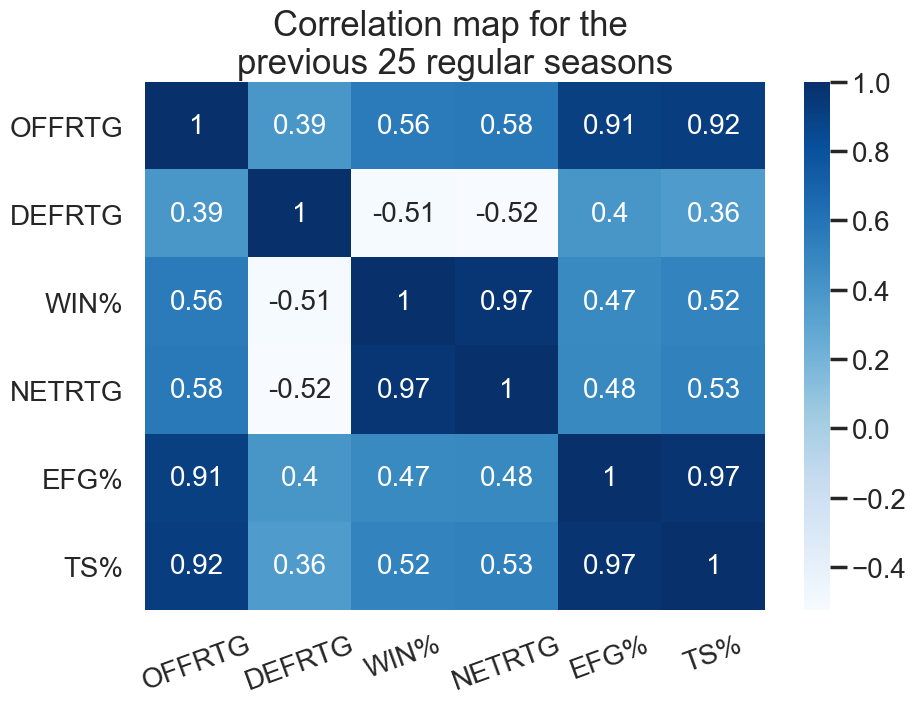

In [712]:
# correlation heat map for past 25 years
x = 2022
lst = []
for df in all_teams:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
previous 25 regular seasons''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the previous 25 regular seasons.pdf', bbox_inches='tight')
plt.show()

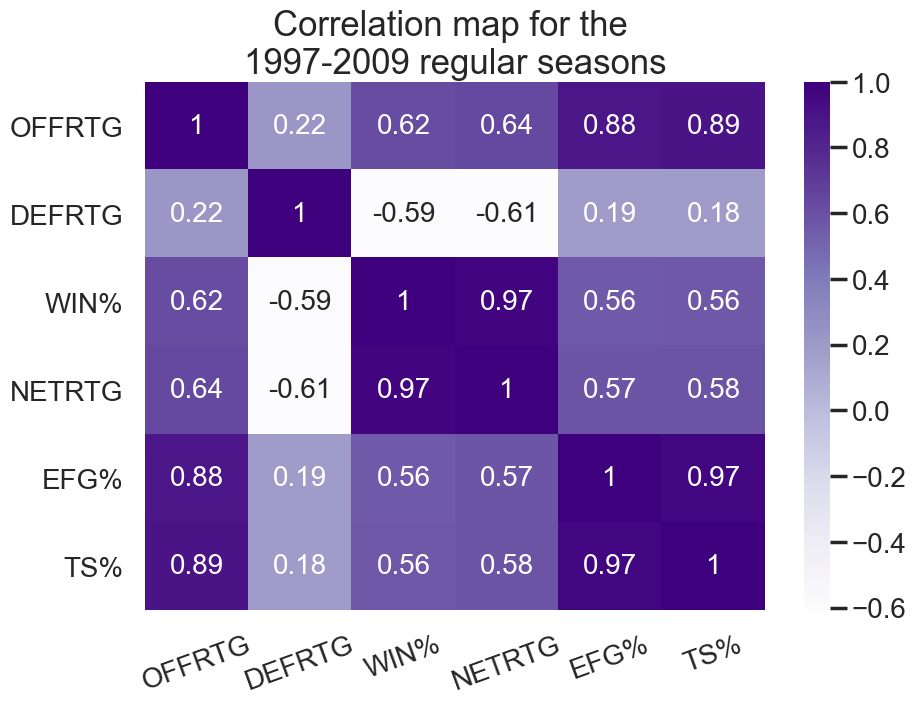

In [713]:
# correlation heat map from 1997-2009 years
x = 2010
lst = []
for df in teams_97_09:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
1997-2009 regular seasons''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Purples", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the 1997-2009 regular seasons.pdf', bbox_inches='tight')
plt.show()

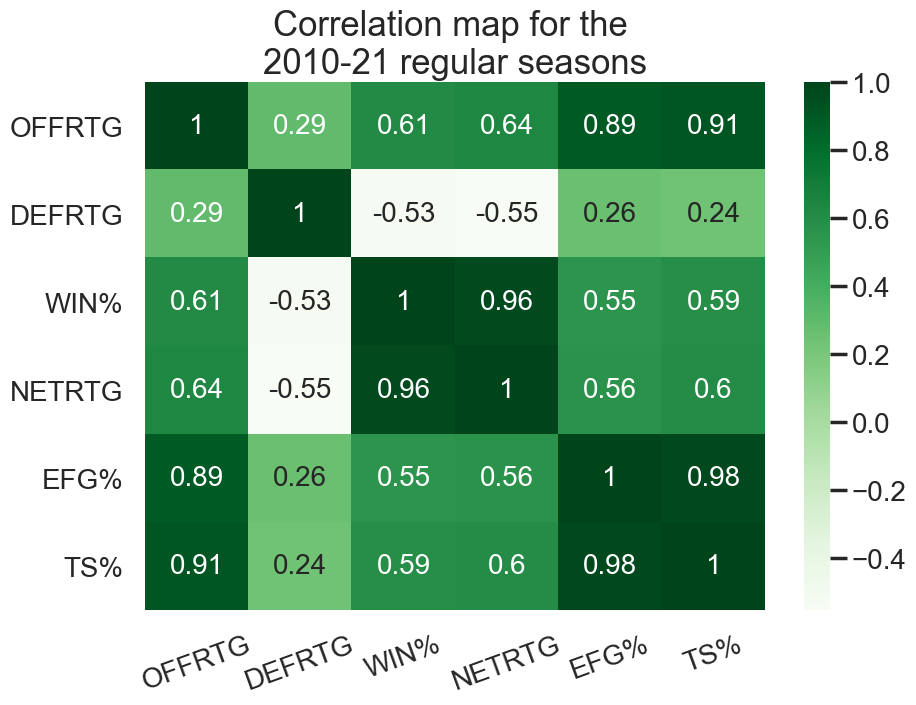

In [714]:
# correlation heat map from 2010-2021 years
x = 2022
lst = []
for df in teams_10_21:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
2010-21 regular seasons''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Greens", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the 2010-2021 regular seasons.pdf', bbox_inches='tight')
plt.show()

In [273]:
# import 26 dataframes into excel 

#with pd.ExcelWriter('nbaRegularSeason_TeamStatsMerged.xlsx') as writer:
#    df_EffiencyR2.to_excel(writer, sheet_name='R2 Efficiency and Win%', index=True)
#    df_offrtgR2.to_excel(writer, sheet_name='R2 Scoring and Efficiency', index=True)
#    df_team21.to_excel(writer, sheet_name='2021-22', index=True)
#    df_team20.to_excel(writer, sheet_name='2020-21', index=True)
#    df_team19.to_excel(writer, sheet_name='2019-20', index=True)
#    df_team18.to_excel(writer, sheet_name='2018-19', index=True)
#    df_team17.to_excel(writer, sheet_name='2017-18', index=True)
#    df_team16.to_excel(writer, sheet_name='2016-17', index=True)
#    df_team15.to_excel(writer, sheet_name='2015-16', index=True)
#    df_team14.to_excel(writer, sheet_name='2014-15', index=True)
#    df_team13.to_excel(writer, sheet_name='2013-14', index=True)
#    df_team12.to_excel(writer, sheet_name='2012-13', index=True)
#    df_team11.to_excel(writer, sheet_name='2011-12', index=True) 
#    df_team10.to_excel(writer, sheet_name='2010-11', index=True)
#    df_team09.to_excel(writer, sheet_name='2009-10', index=True)
#    df_team08.to_excel(writer, sheet_name='2008-09', index=True)
#    df_team07.to_excel(writer, sheet_name='2007-08', index=True)
#    df_team06.to_excel(writer, sheet_name='2006-07', index=True)
#    df_team05.to_excel(writer, sheet_name='2005-06', index=True)
#    df_team04.to_excel(writer, sheet_name='2004-05', index=True)
#    df_team03.to_excel(writer, sheet_name='2003-04', index=True)
#    df_team02.to_excel(writer, sheet_name='2002-03', index=True)
#    df_team01.to_excel(writer, sheet_name='2001-02', index=True)
#    df_team00.to_excel(writer, sheet_name='2000-01', index=True)
#    df_team99.to_excel(writer, sheet_name='1999-00', index=True)
#    df_team98.to_excel(writer, sheet_name='1998-99', index=True)
#    df_team97.to_excel(writer, sheet_name='1997-98', index=True)